In [141]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, RobustScaler
#from sklearn_extra.cluster import KMedoids # pip install scikit-learn-extra

import matplotlib.pyplot as plt



In [142]:
data = pd.read_csv('ar41_for_ulb_cleaned.csv', delimiter=';')

## Scaling

In [143]:
# Select the relevant columns for clustering
features = ['RS_E_InAirTemp_PC1', 'RS_E_InAirTemp_PC2', 'RS_E_OilPress_PC1',
            'RS_E_OilPress_PC2', 'RS_E_RPM_PC1', 'RS_E_RPM_PC2', 'RS_E_WatTemp_PC1',
            'RS_E_WatTemp_PC2', 'RS_T_OilTemp_PC1', 'RS_T_OilTemp_PC2', 'temperature',
            'precipitation', 'windspeed_10m', 'sum_pollen']


# drop timestamp feature
#data = data.drop(columns=['timestamps_UTC'])

# Extract the selected features from the DataFrame
X = data[features]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



## K-means

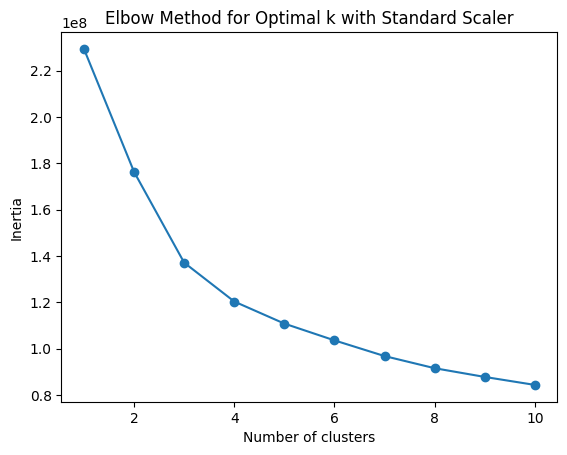

In [144]:
# Find the optimal number of clusters using the Elbow method

inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k with Standard Scaler')
plt.show()



In [145]:
# Choose an appropriate number of clusters (k) based on the Elbow curve

k = 4  # Adjust this value based on the Elbow curve
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(X_scaled)

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=0)

In [146]:
# Add cluster labels to the original DataFrame
data['cluster'] = kmeans.labels_

# Calculate the distance of each point to its assigned cluster center
data['distance_to_center'] = np.min(kmeans.transform(X_scaled), axis=1)

Moyenne des clusters

In [147]:
means = data.groupby('cluster').mean()
means

/var/folders/fj/rsg75z_s7cq8mvy8kr0fb2ym0000gn/T/ipykernel_20022/3887725278.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  means = data.groupby('cluster').mean()


,mapped_veh_id,lat,lon,RS_E_InAirTemp_PC1,RS_E_InAirTemp_PC2,RS_E_OilPress_PC1,RS_E_OilPress_PC2,RS_E_RPM_PC1,RS_E_RPM_PC2,RS_E_WatTemp_PC1,RS_E_WatTemp_PC2,RS_T_OilTemp_PC1,RS_T_OilTemp_PC2,temperature,precipitation,windspeed_10m,sum_pollen,distance_to_center
cluster,,,,,,,,,,,,,,,,,,
0,149.885058,50.798240,4.204006,15.913022,15.568426,396.811531,402.147483,807.583349,807.724619,54.888245,53.472635,47.716591,46.789646,9.354528,0.086931,13.191080,16.149440,3.195512
1,150.641821,50.866480,4.190368,36.550122,36.293914,219.909964,223.689580,814.064318,814.465777,82.748059,82.368569,83.032204,82.986746,16.221637,0.116547,13.137667,22.831720,2.129674
2,151.318344,50.917864,4.285484,37.158895,37.396158,379.999373,389.704727,1571.265443,1572.623215,83.910221,83.330770,85.192073,85.165814,13.214669,0.108775,13.545658,18.020002,2.667210
3,150.438104,50.869969,4.241935,20.919720,21.340696,251.220325,265.913961,812.190137,811.554200,76.397577,75.303910,74.702930,73.848931,7.747758,0.086823,13.523338,10.531875,2.383217


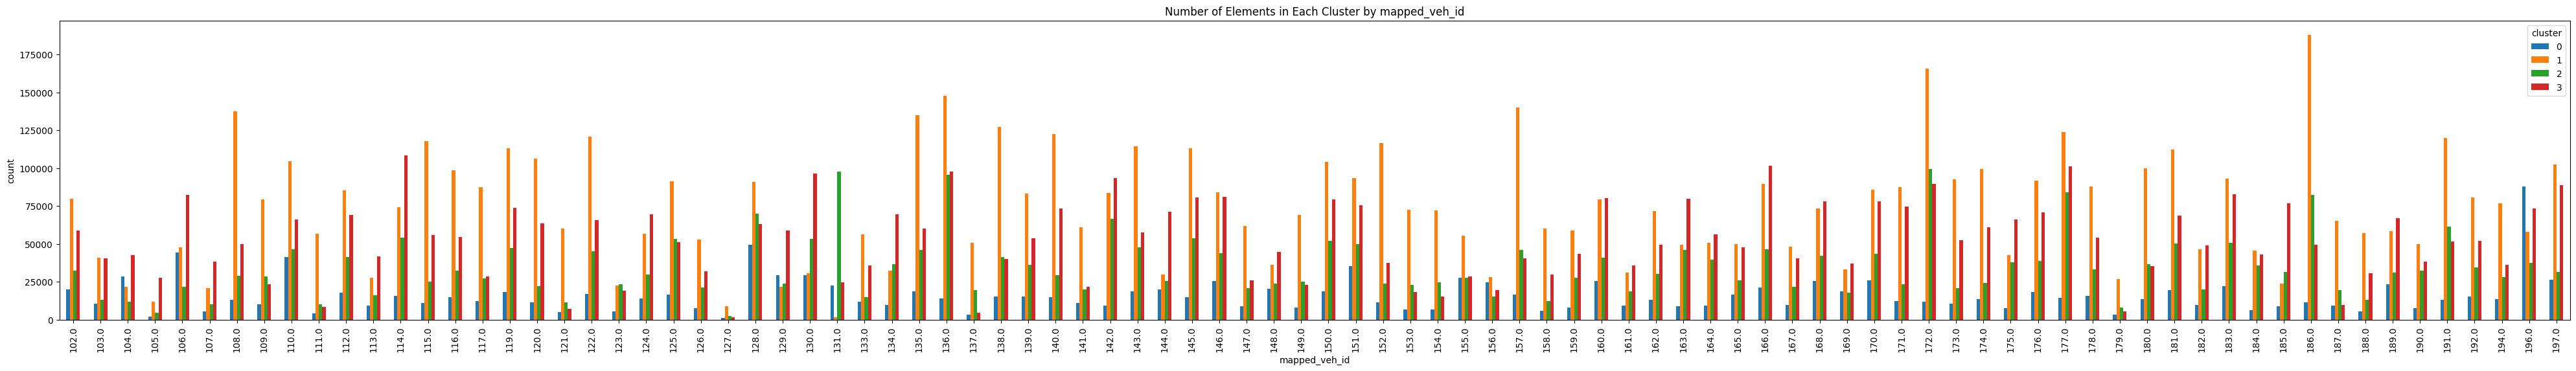

In [148]:
# Group the data by 'mapped_veh_id' and 'cluster_Standard' and calculate the count
cluster_elements = data.groupby(['mapped_veh_id', 'cluster']).size().reset_index(name='count')

# Pivot the data to have 'mapped_veh_id' as the index, 'cluster' as the columns, and 'count' as the values
pivot_data = cluster_elements.pivot(index='mapped_veh_id', columns='cluster', values='count')

# Plot the bar graph
pivot_data.plot(kind='bar', stacked=False, figsize=(50, 6))
plt.xlabel('mapped_veh_id')
plt.ylabel('count')
plt.title('Number of Elements in Each Cluster by mapped_veh_id')
plt.show()

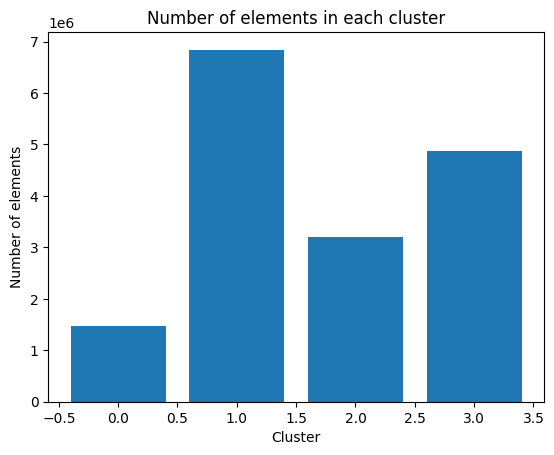

In [149]:
# count the number of elements in each cluster
cluster_elements = data.groupby(['cluster']).size().reset_index(name='count')
# plot the results
plt.bar(cluster_elements['cluster'], cluster_elements['count'])
plt.xlabel('Cluster')
plt.ylabel('Number of elements')
plt.title('Number of elements in each cluster')
plt.show()


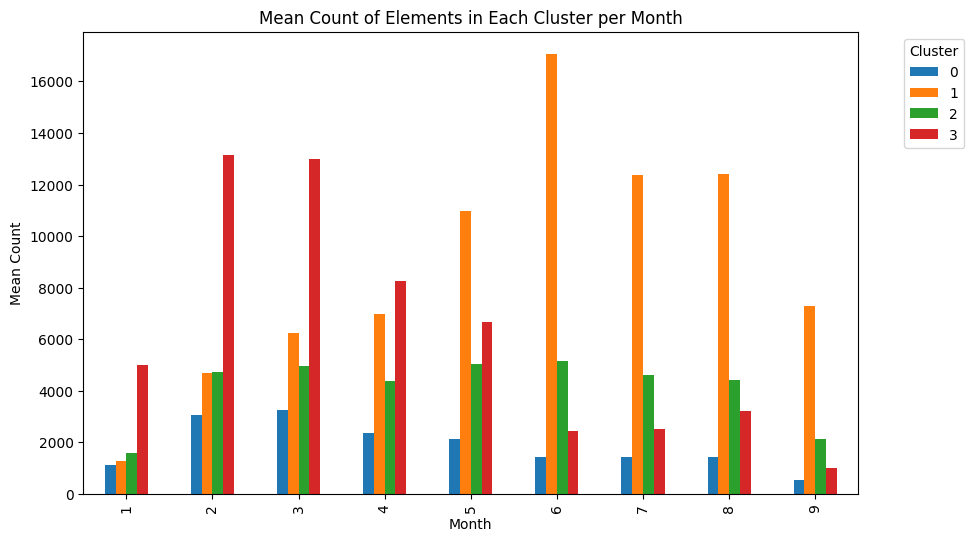

In [150]:
# Extract the month from the 'timestamps_UTC' column
data['month'] = pd.to_datetime(data['timestamps_UTC']).dt.month

# Group the data by 'mapped_veh_id', 'month', and 'cluster' and calculate the count
cluster_elements = data.groupby(['mapped_veh_id', 'month', 'cluster']).size().reset_index(name='count')

# Group by 'month' and 'cluster' and calculate the mean count
mean_count = cluster_elements.groupby(['month', 'cluster'])['count'].mean().reset_index()

# Pivot the data to have 'month' as the index, 'cluster' as the columns, and 'count' as the values
pivot_data = mean_count.pivot(index='month', columns='cluster', values='count')

# Define a custom color palette
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Plot the bar graph for mean count for each cluster per month
pivot_data.plot(kind='bar', stacked=False, figsize=(10, 6), color=custom_colors)
plt.xlabel('Month')
plt.ylabel('Mean Count')
plt.title('Mean Count of Elements in Each Cluster per Month')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

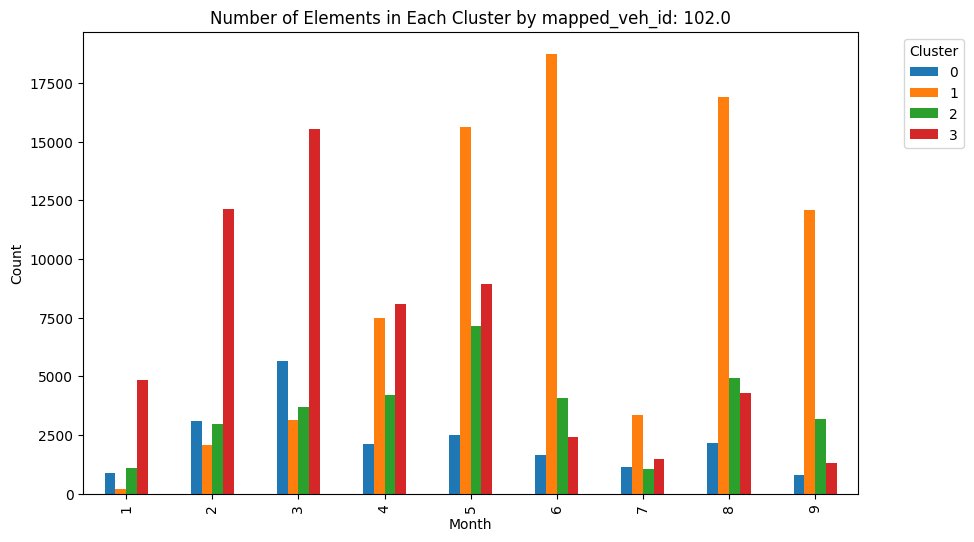

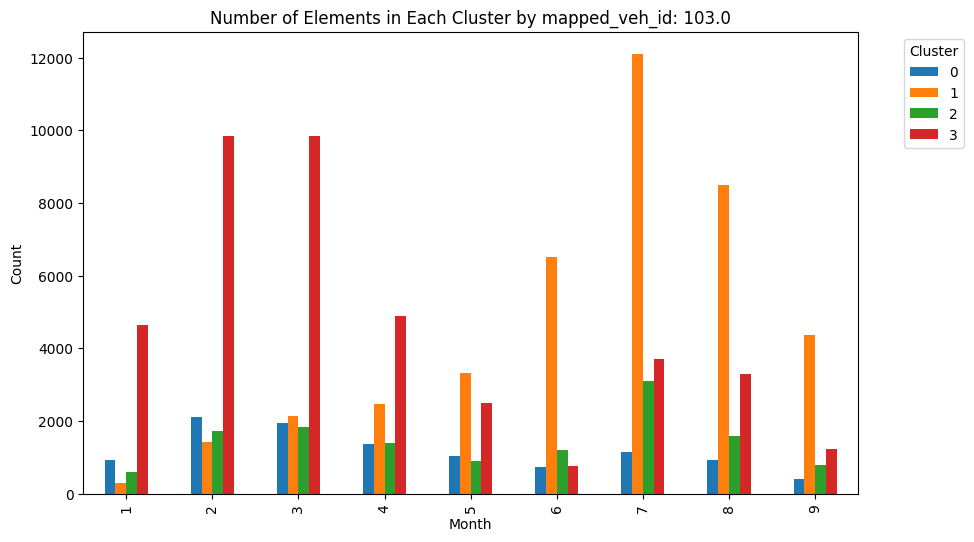

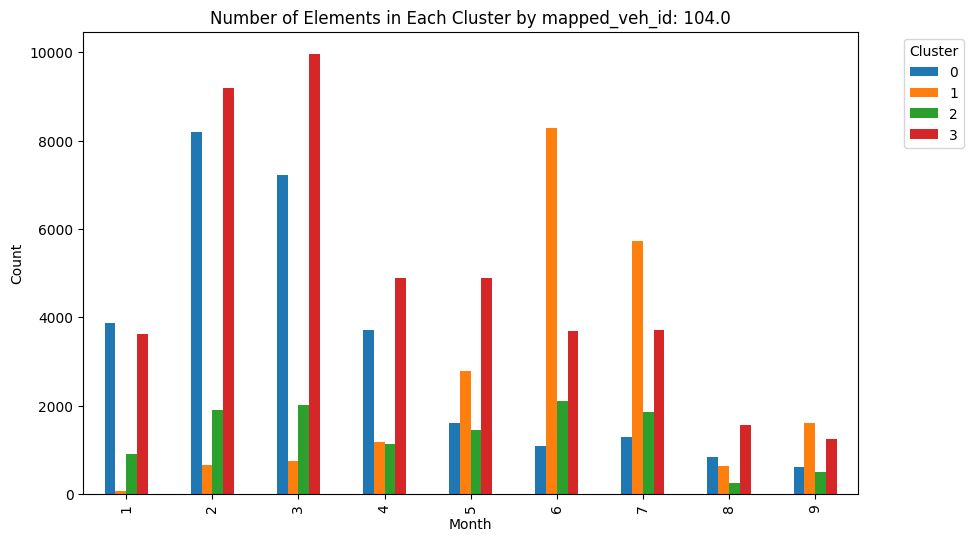

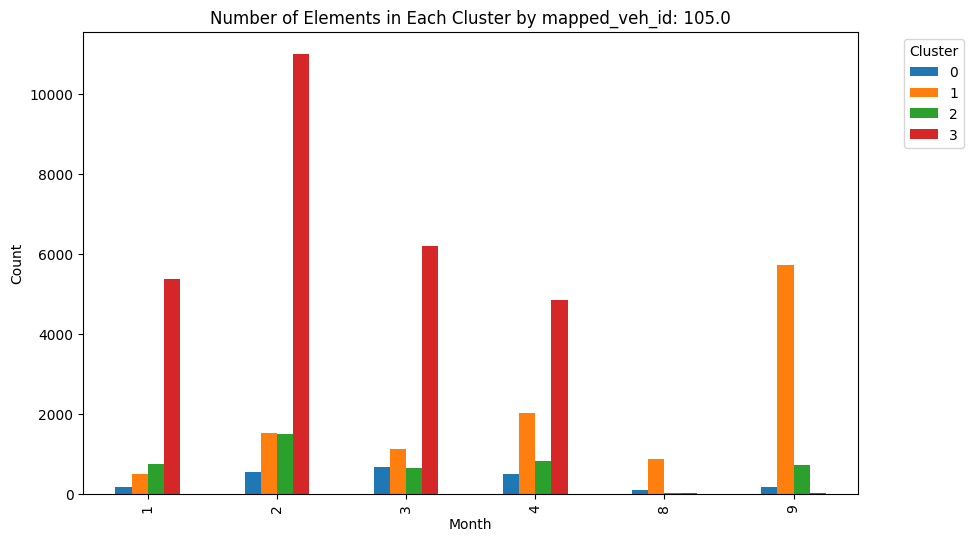

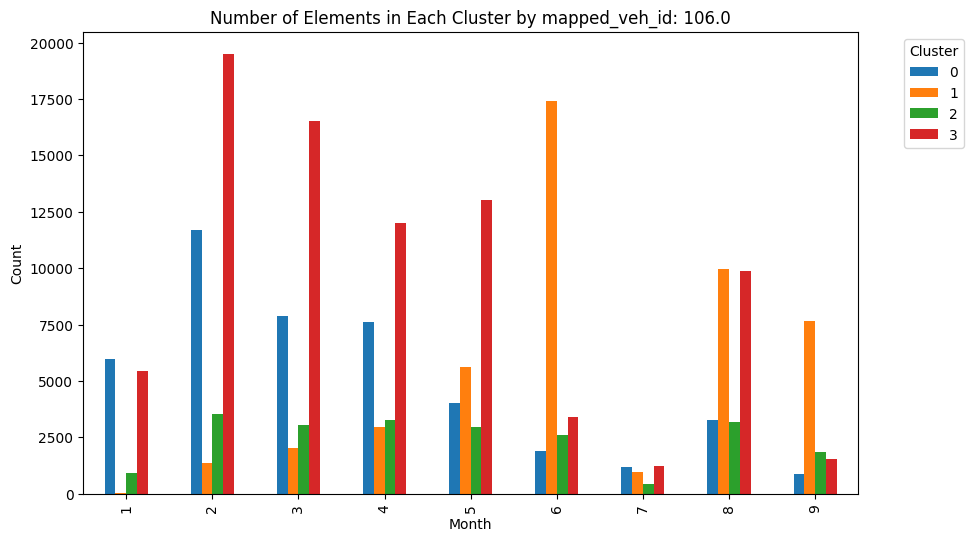

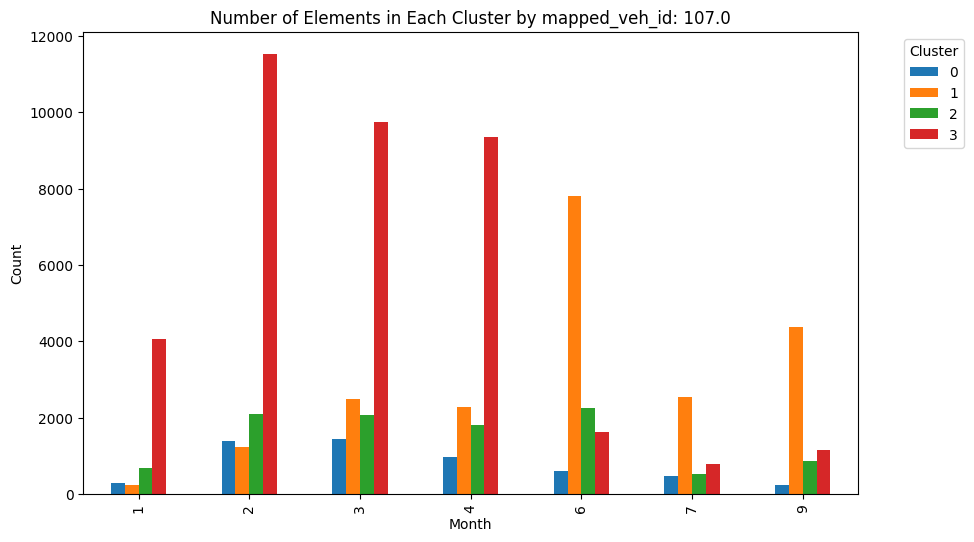

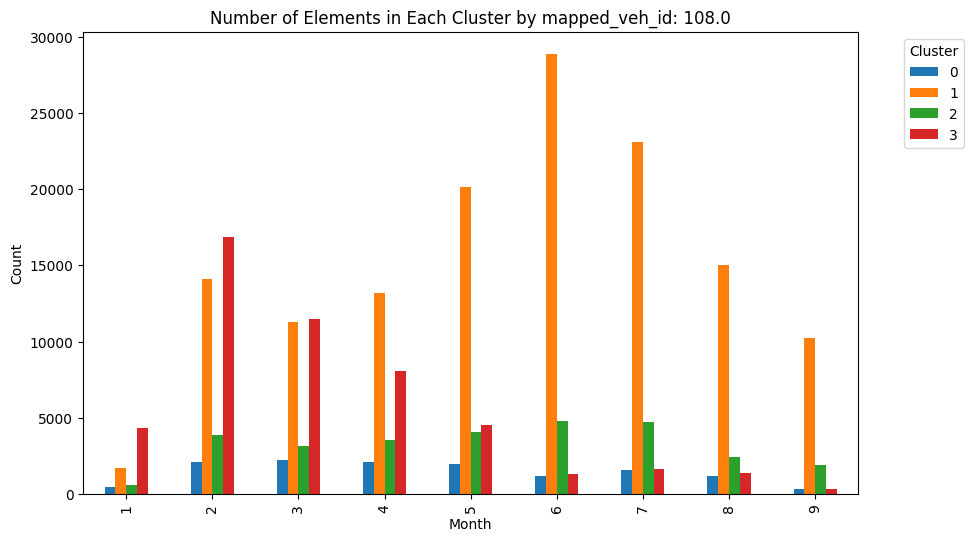

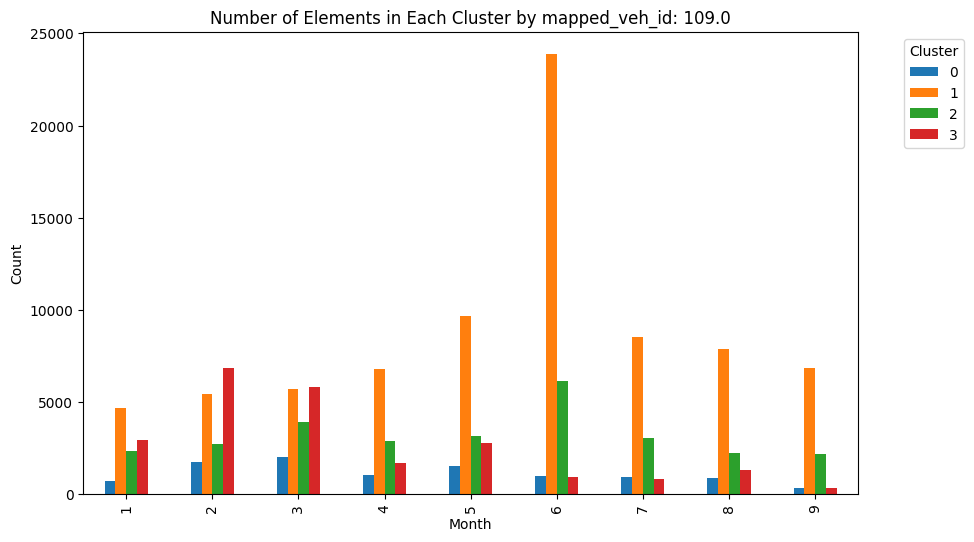

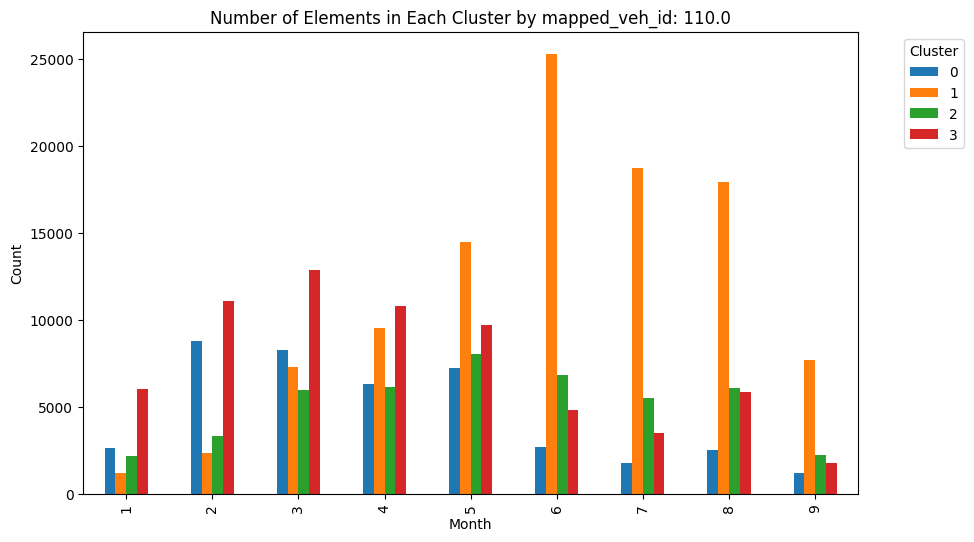

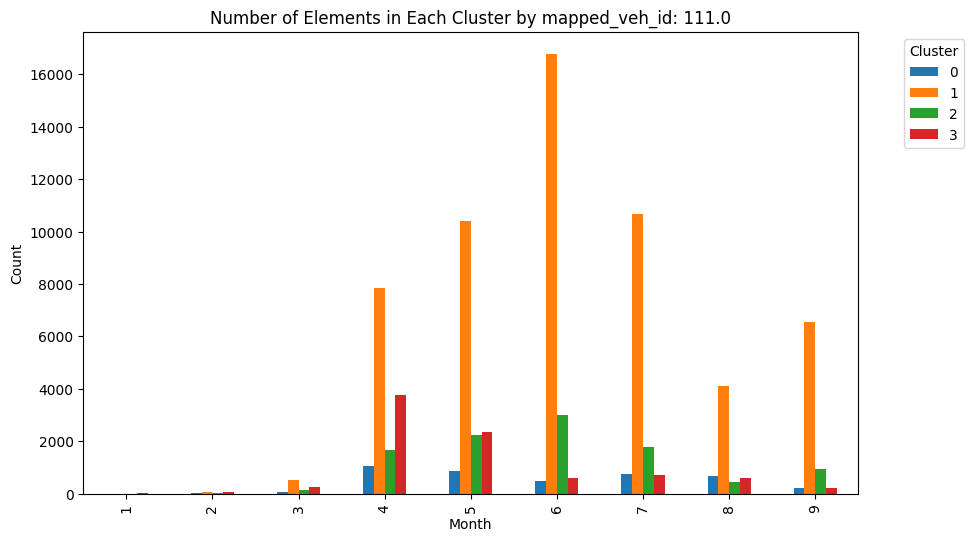

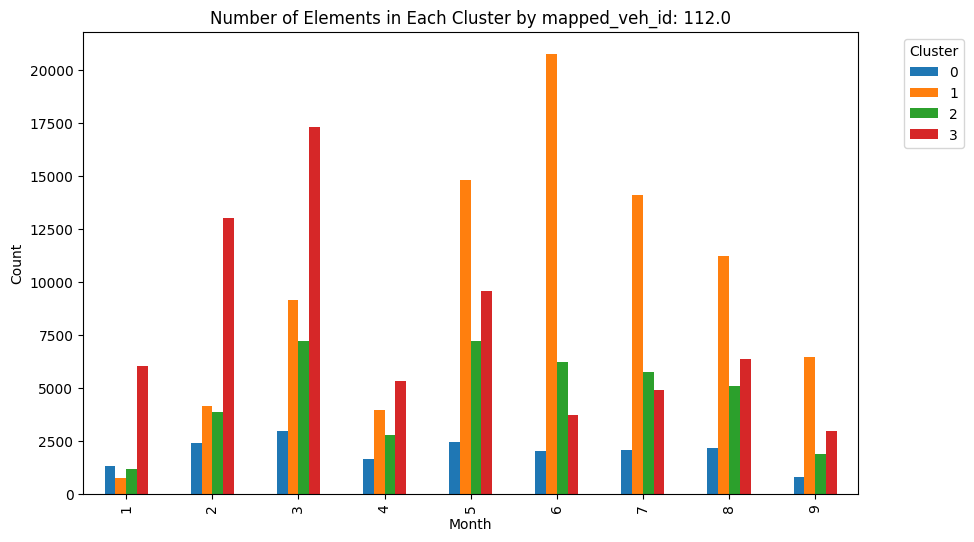

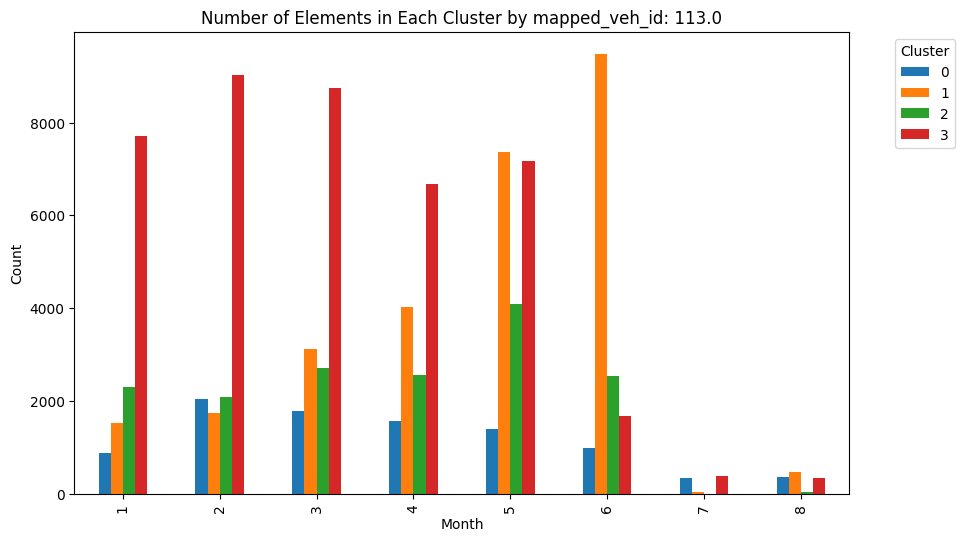

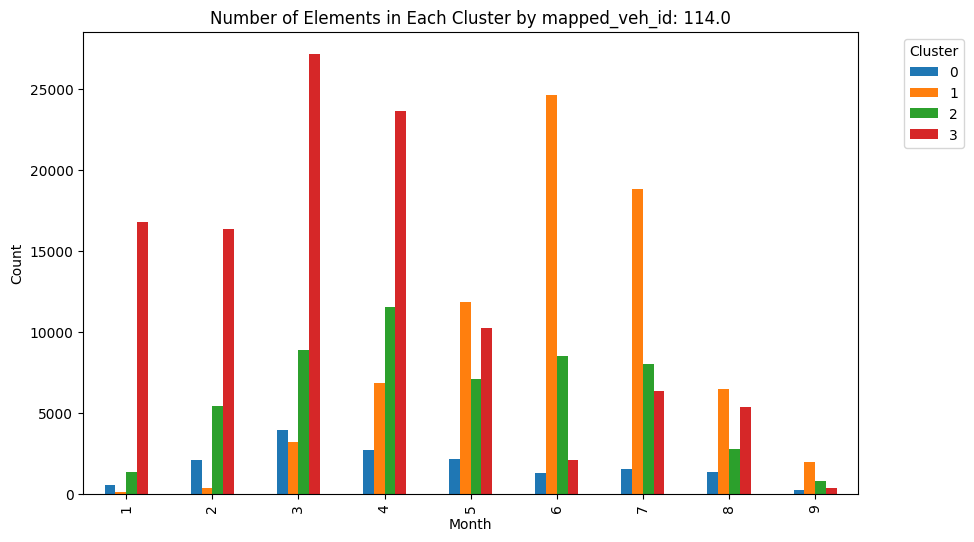

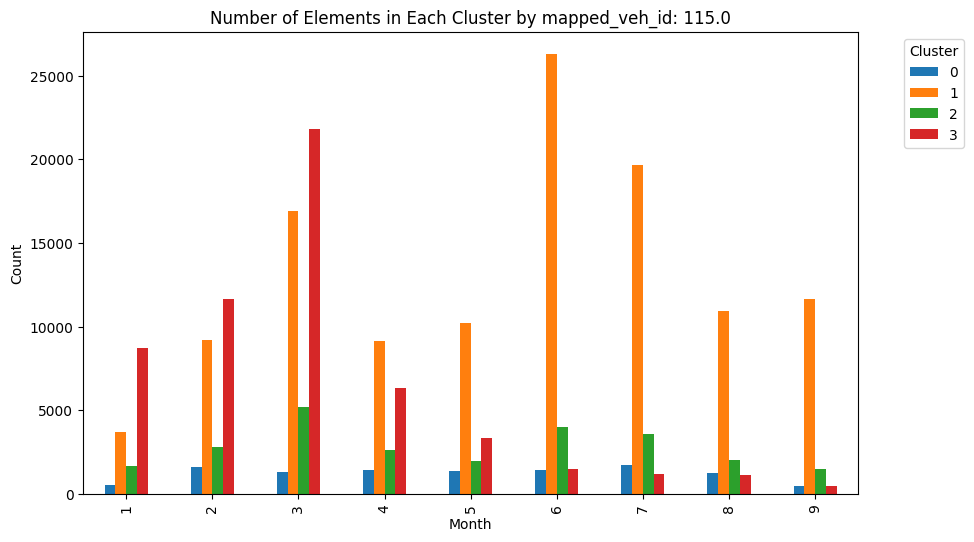

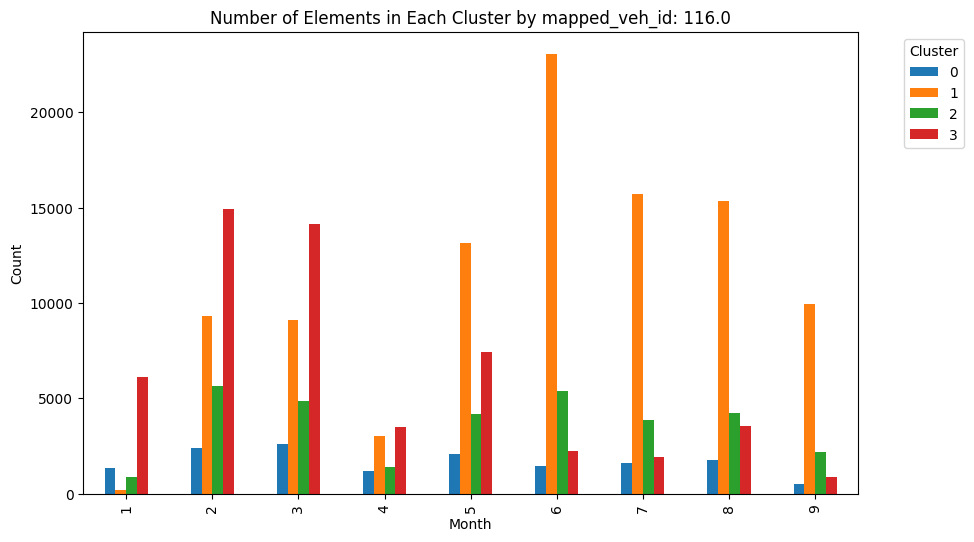

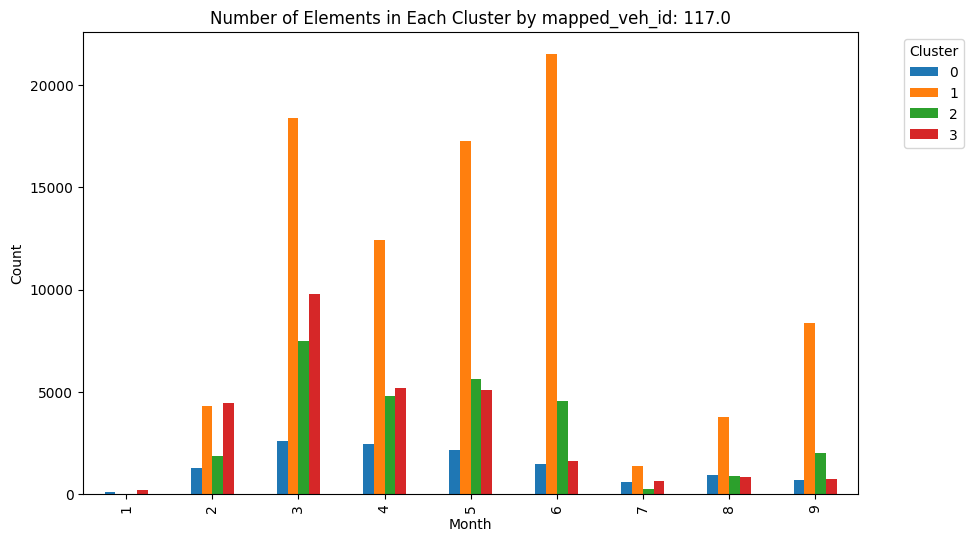

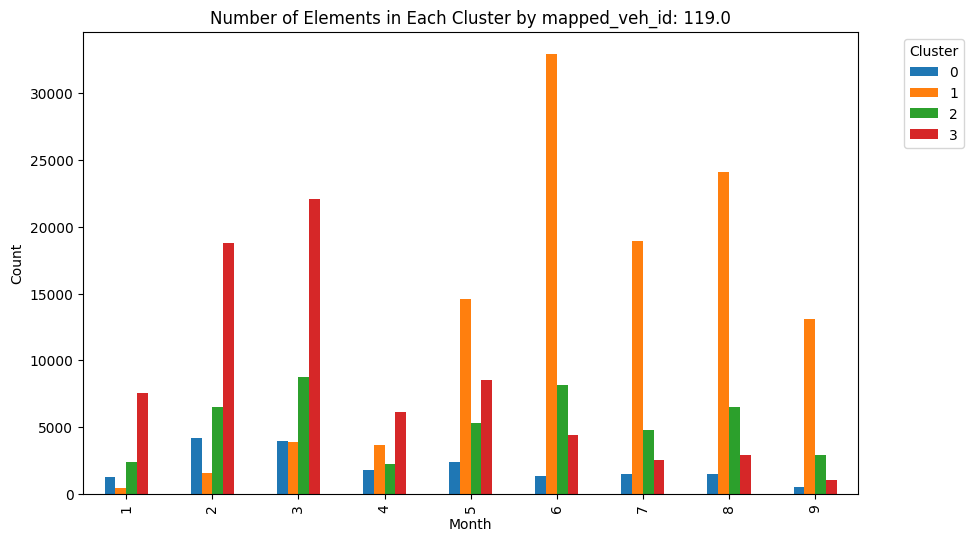

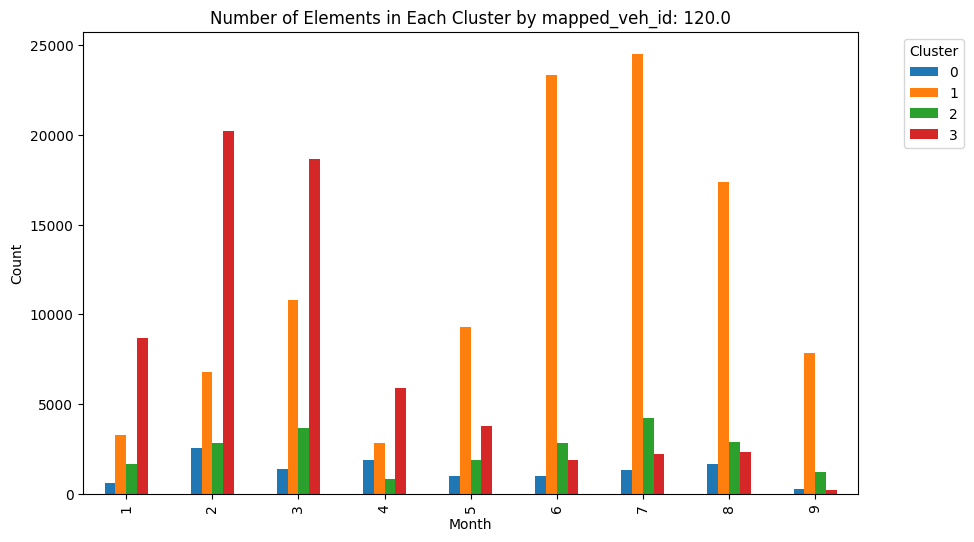

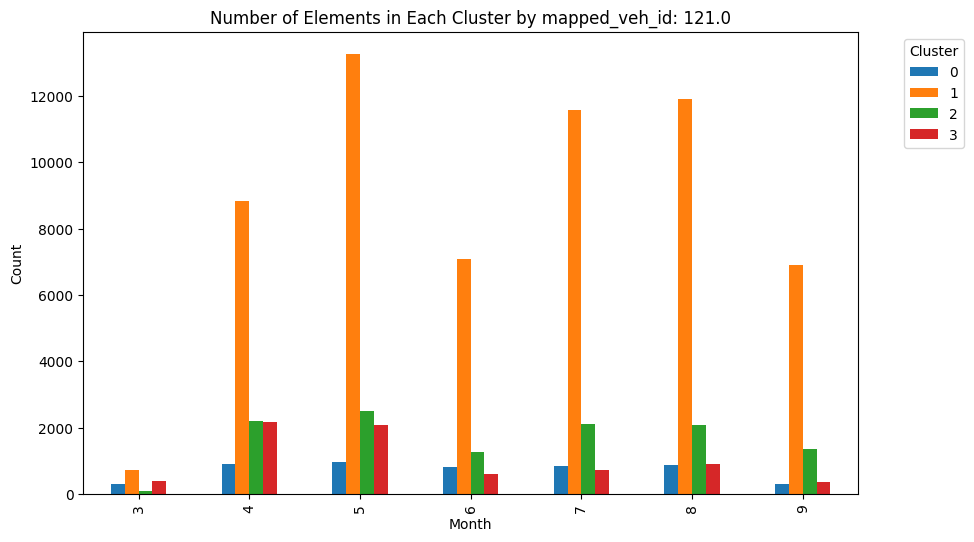

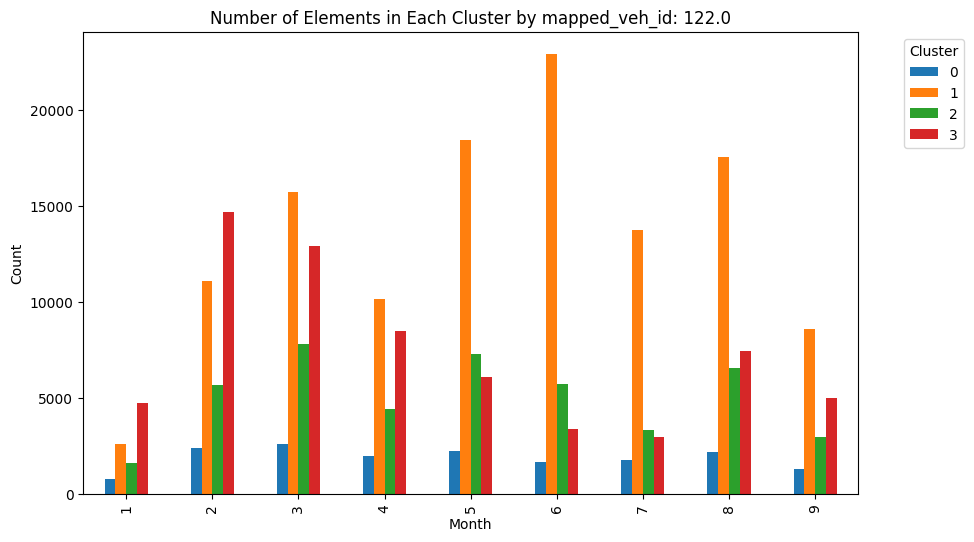

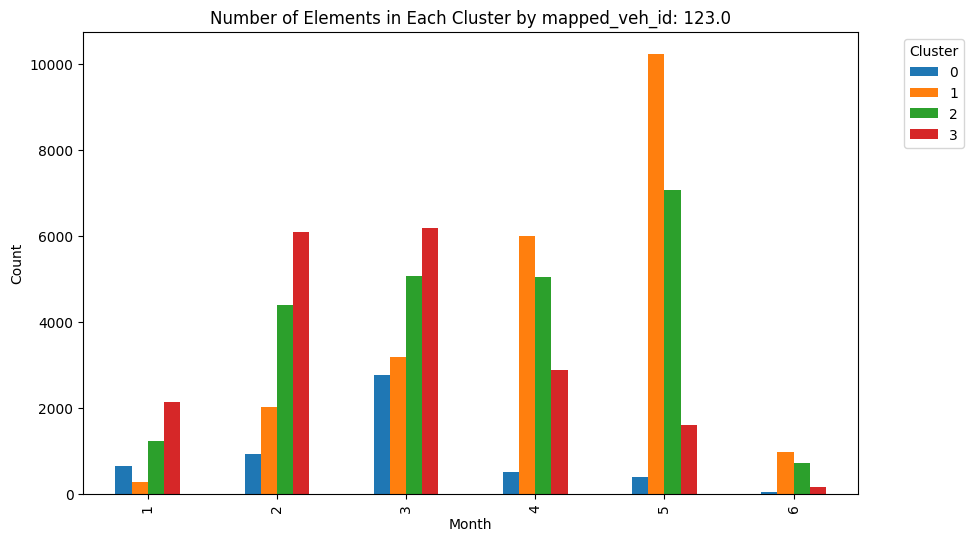

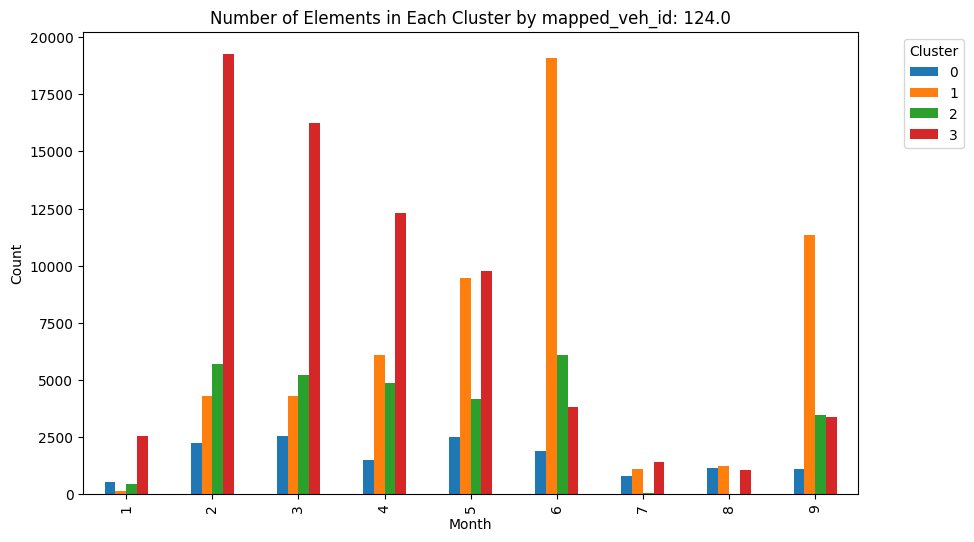

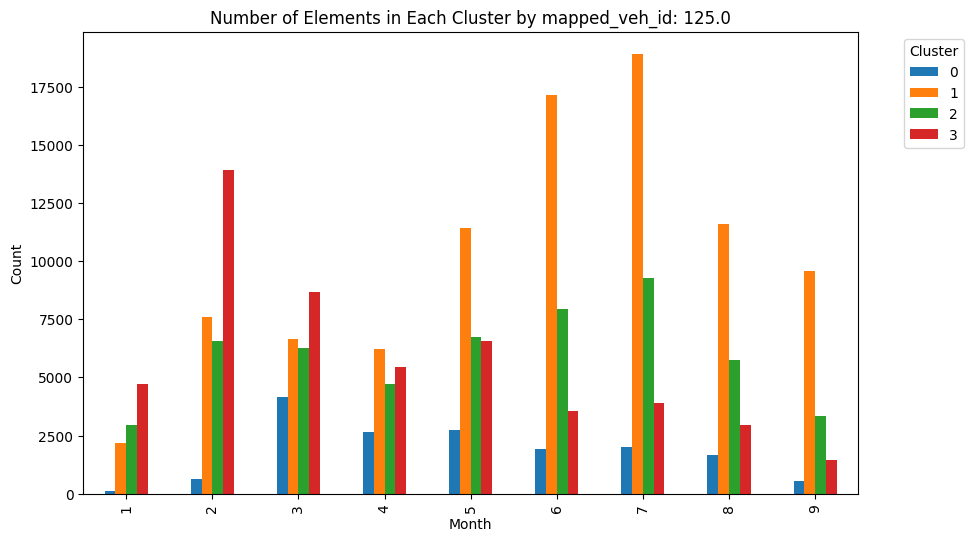

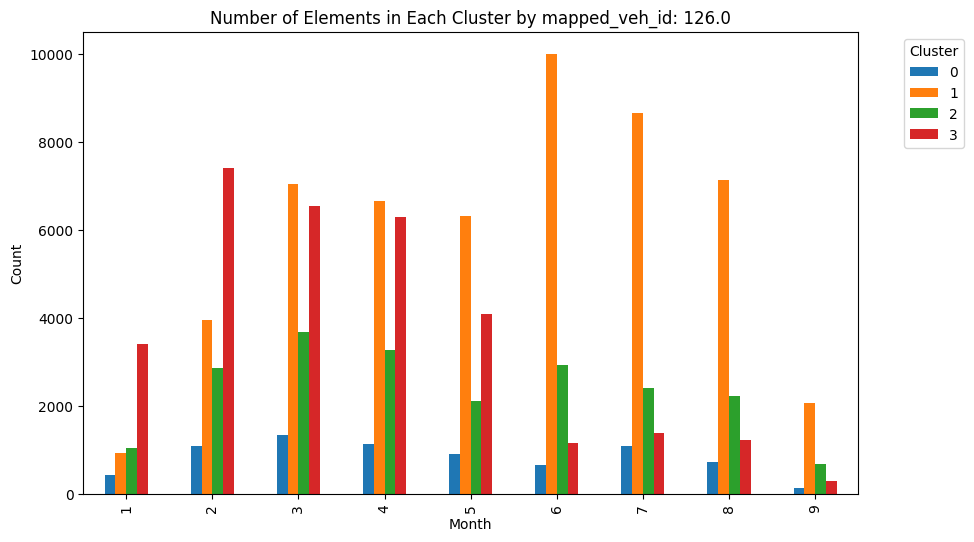

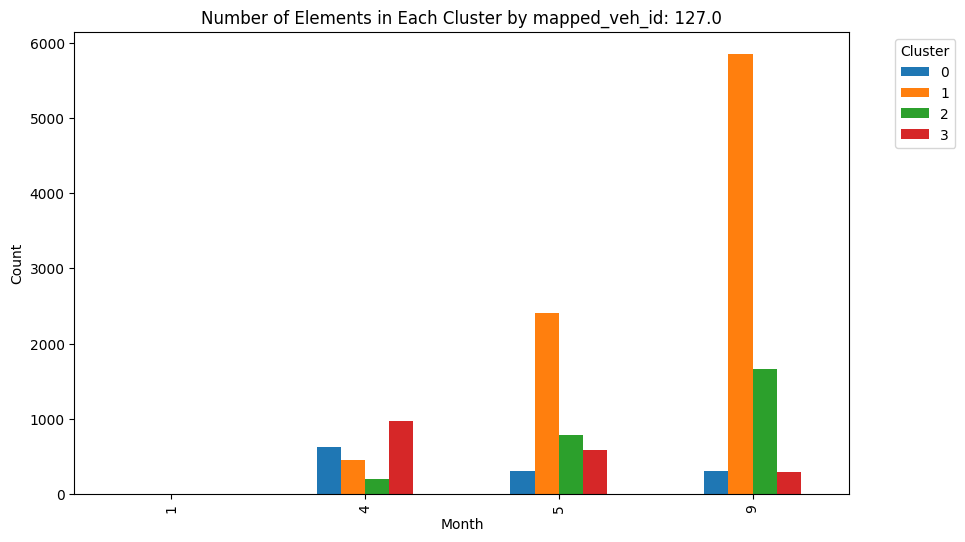

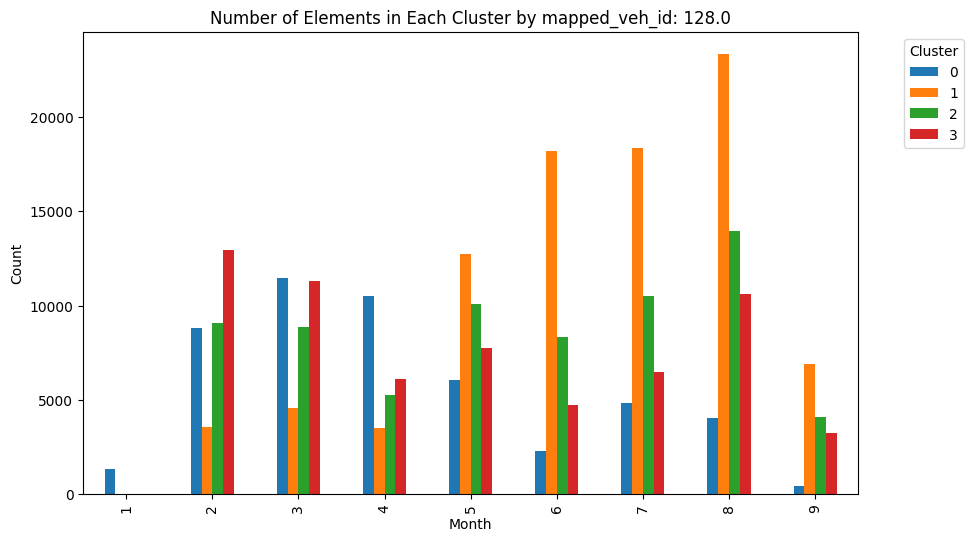

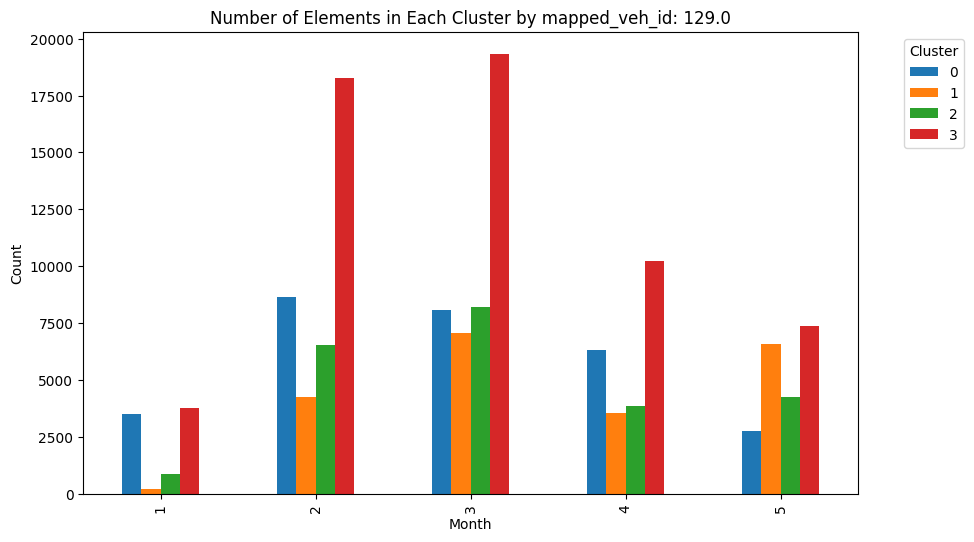

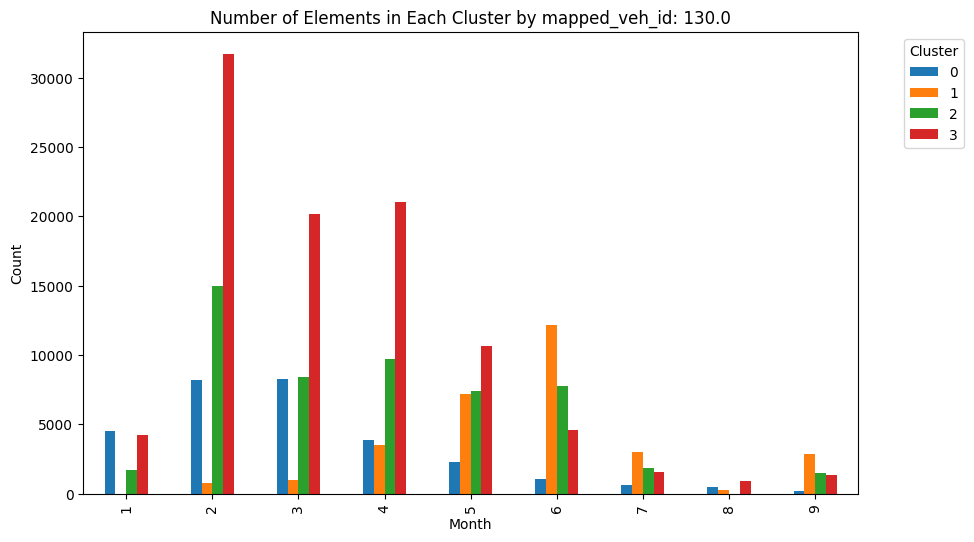

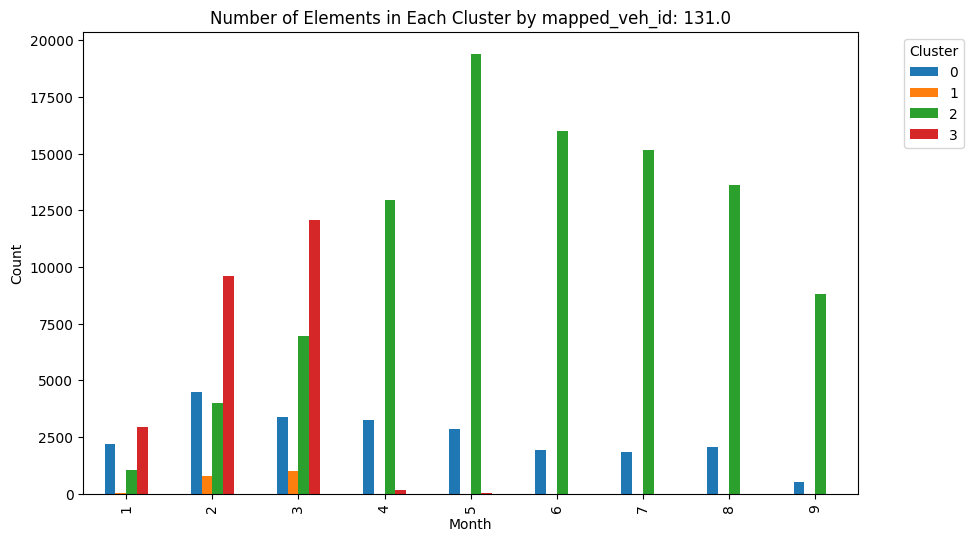

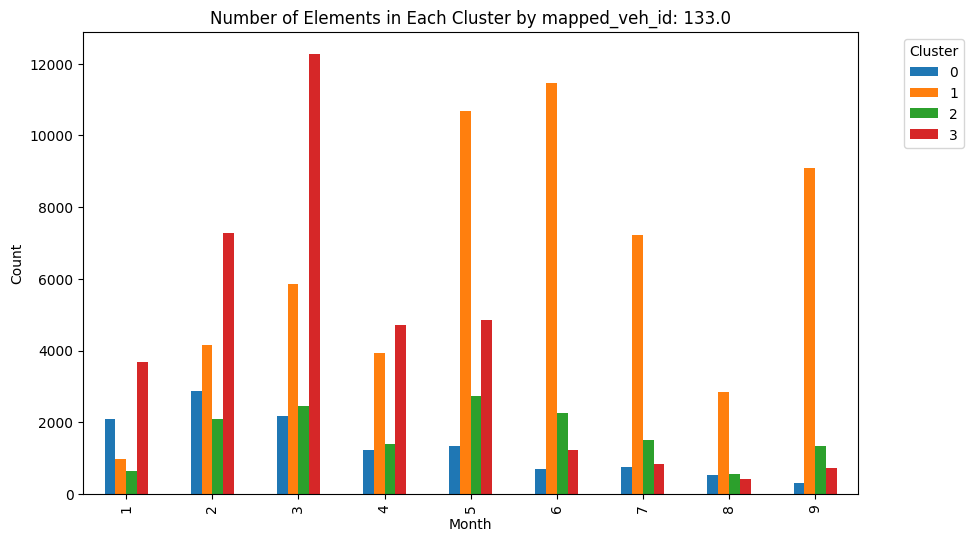

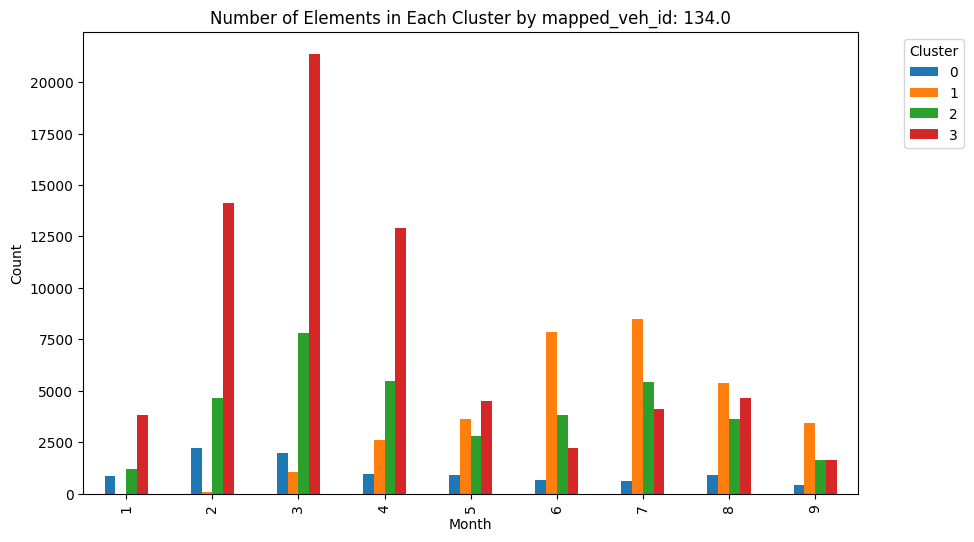

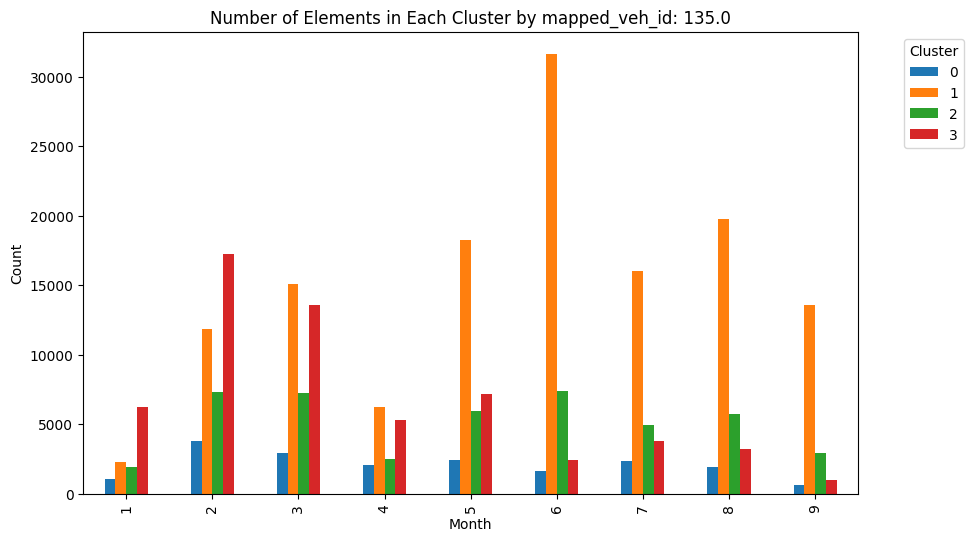

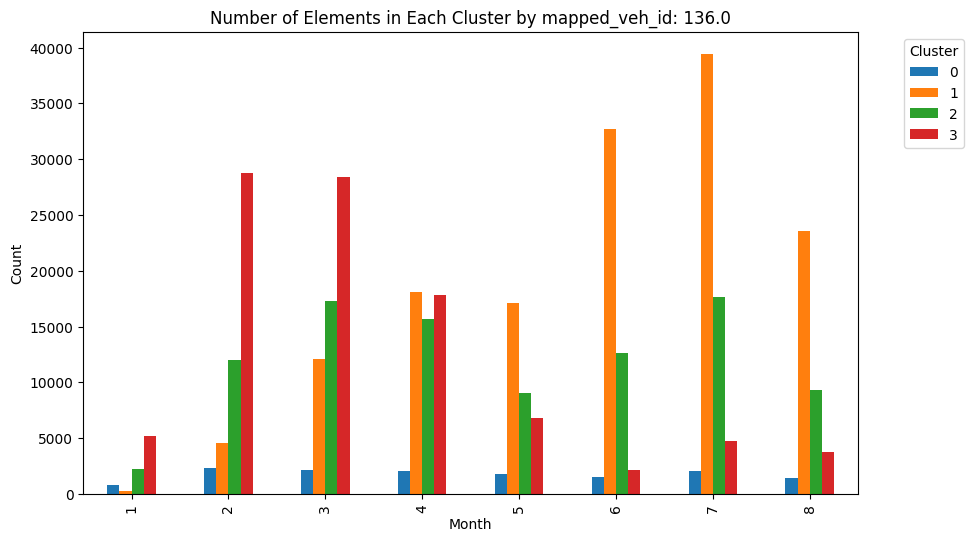

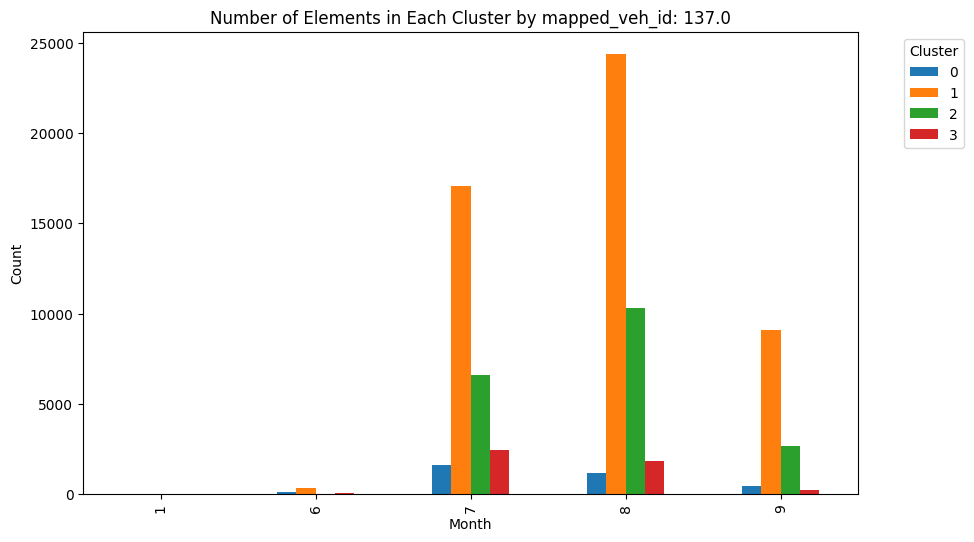

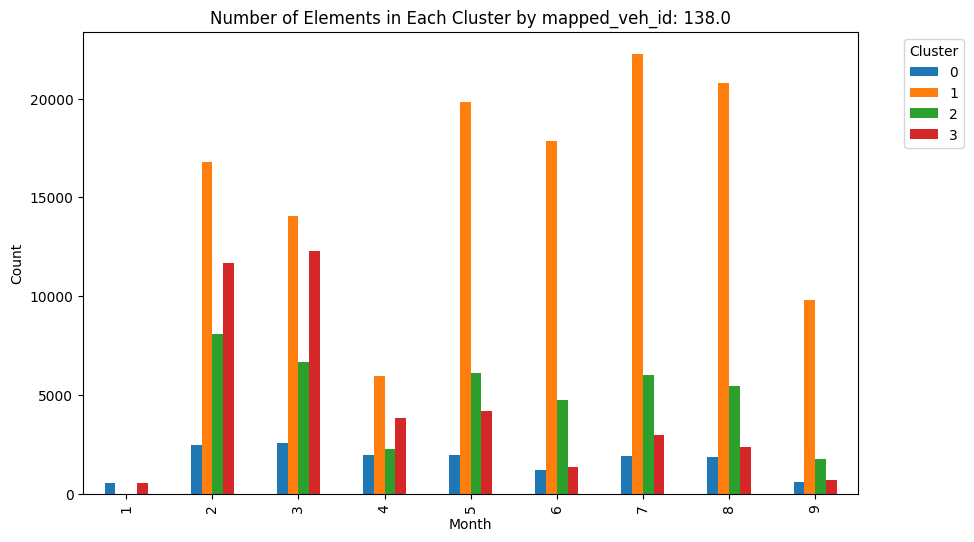

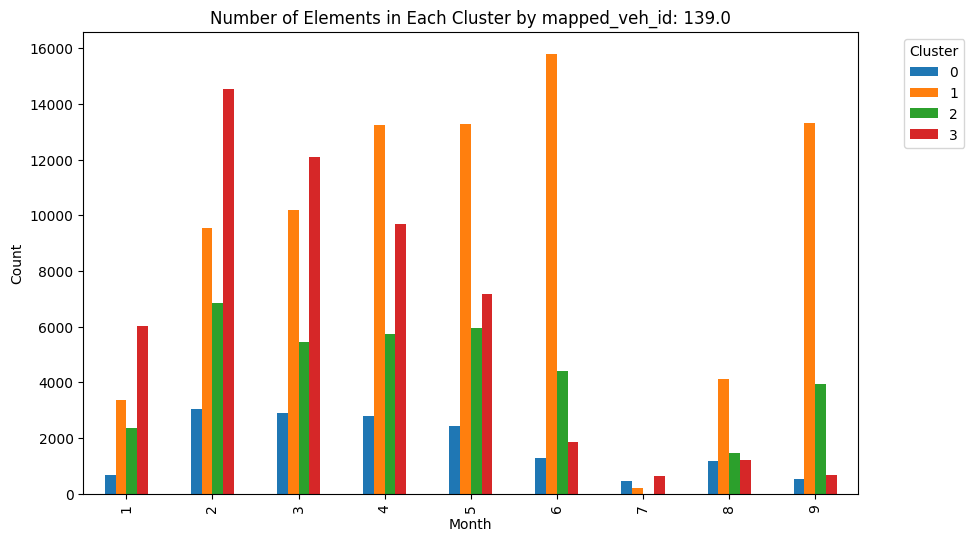

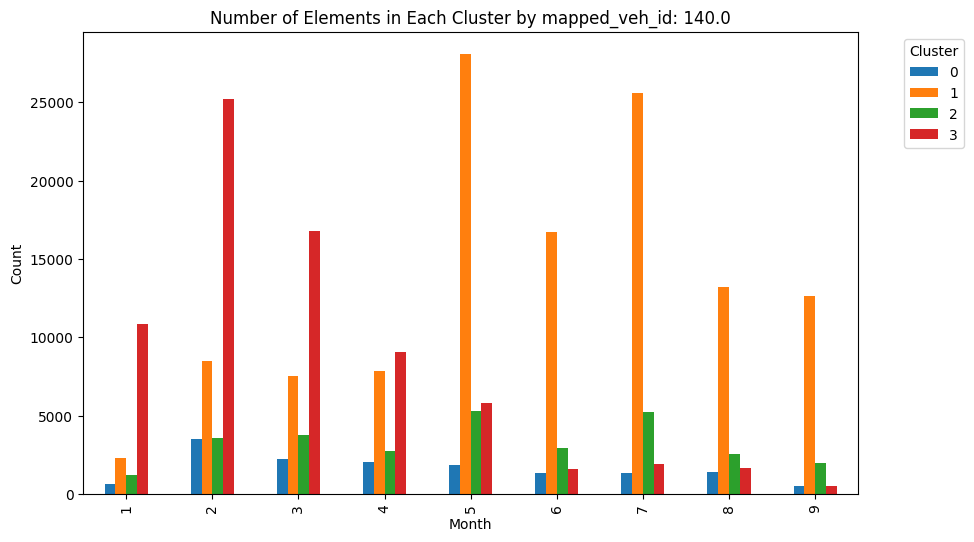

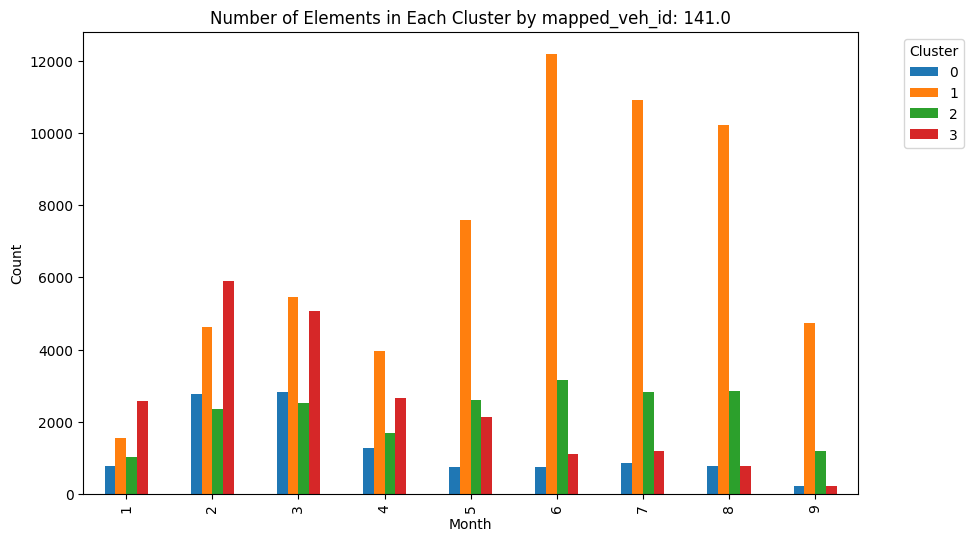

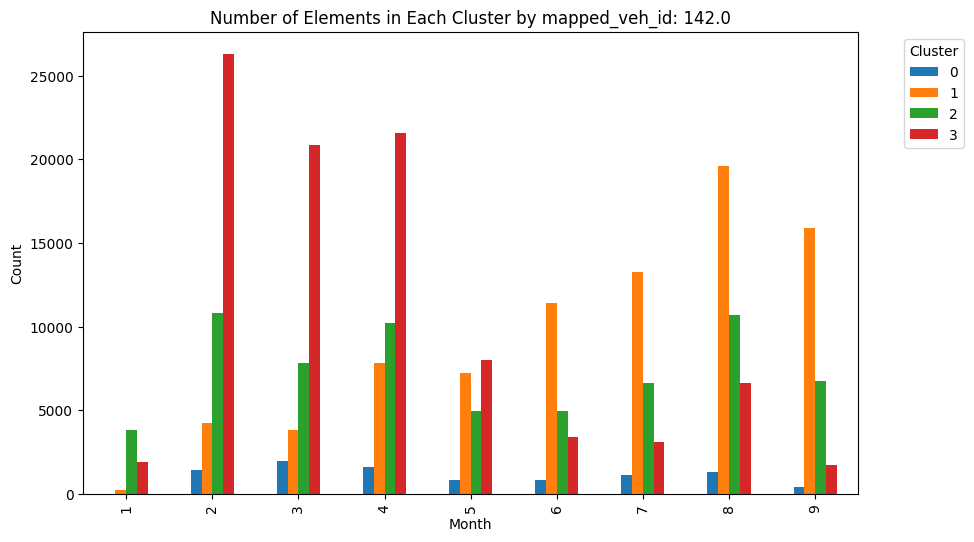

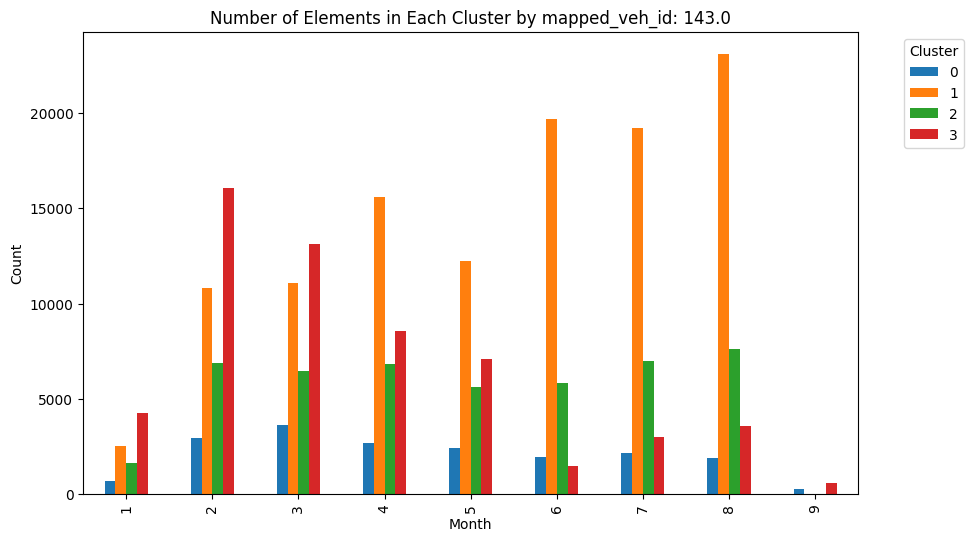

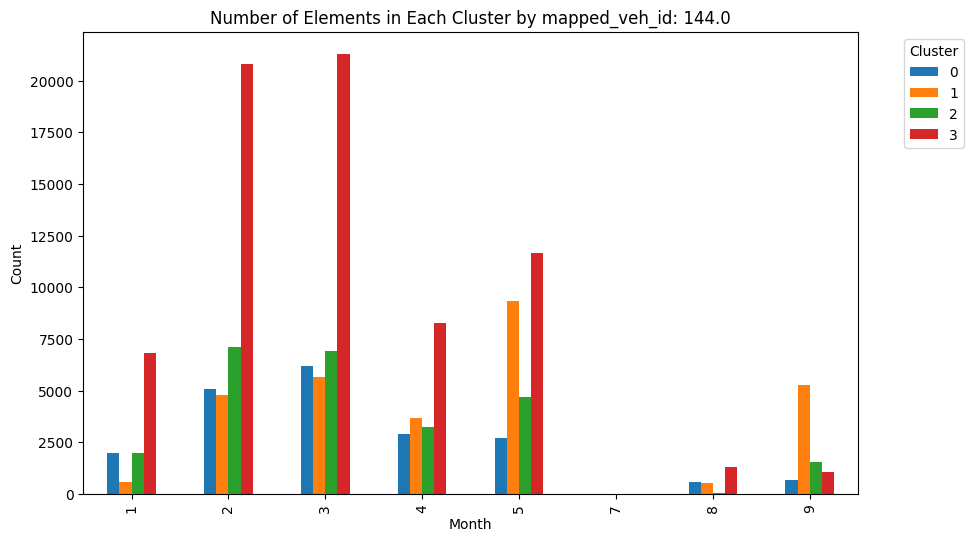

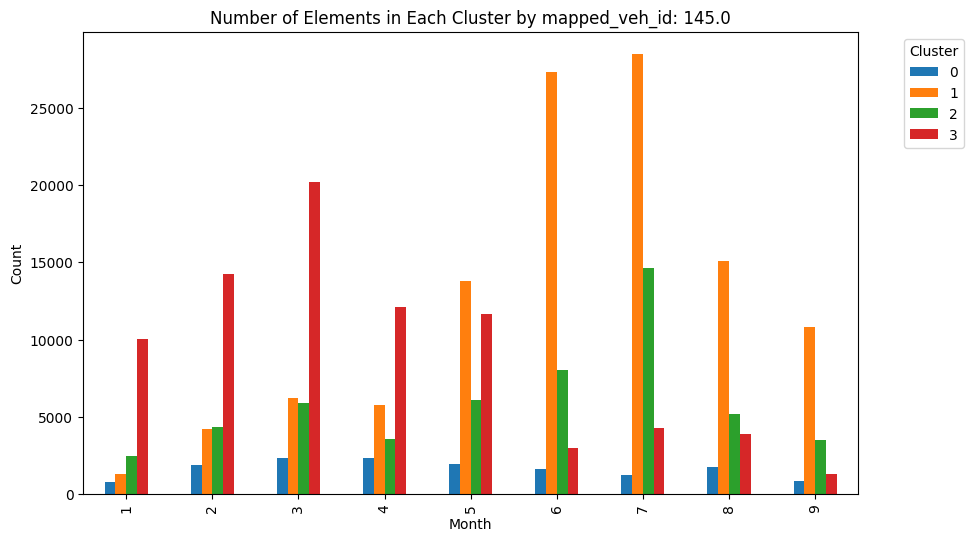

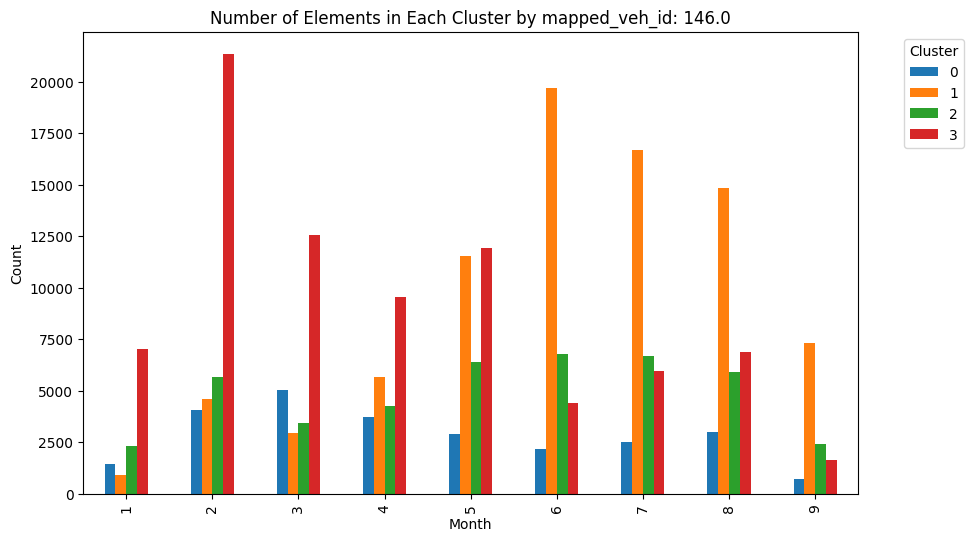

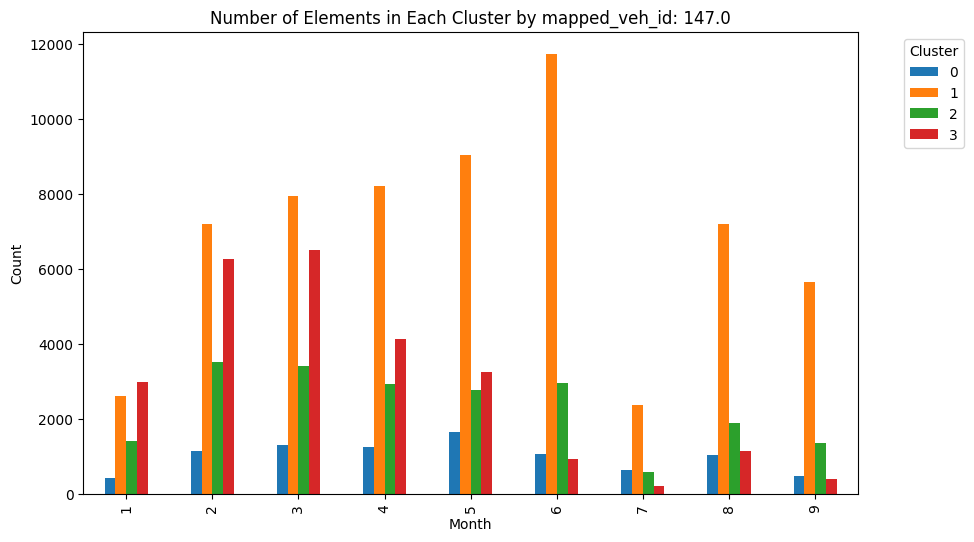

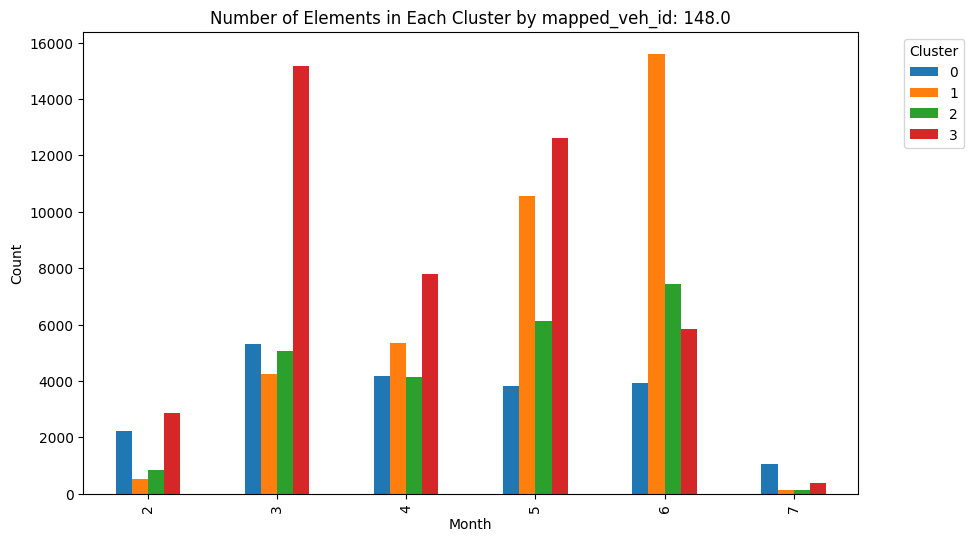

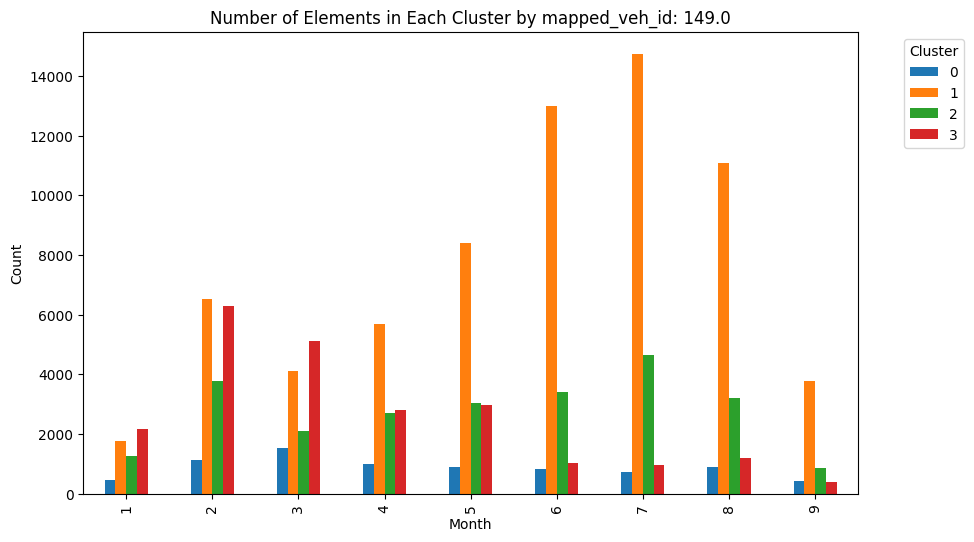

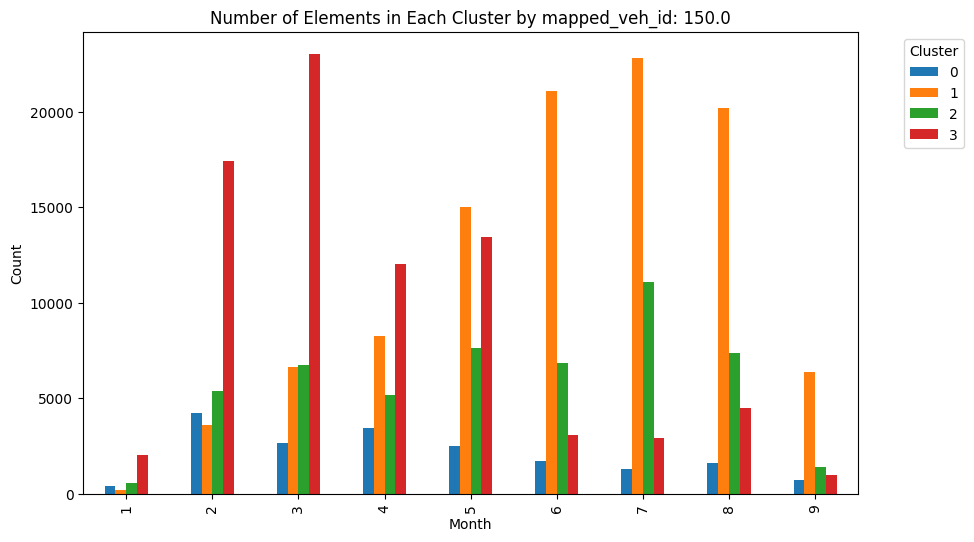

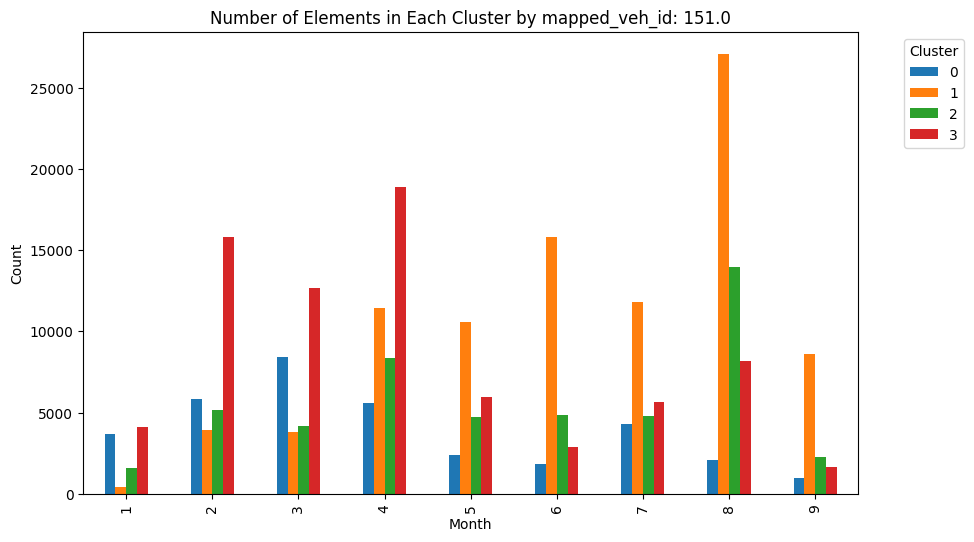

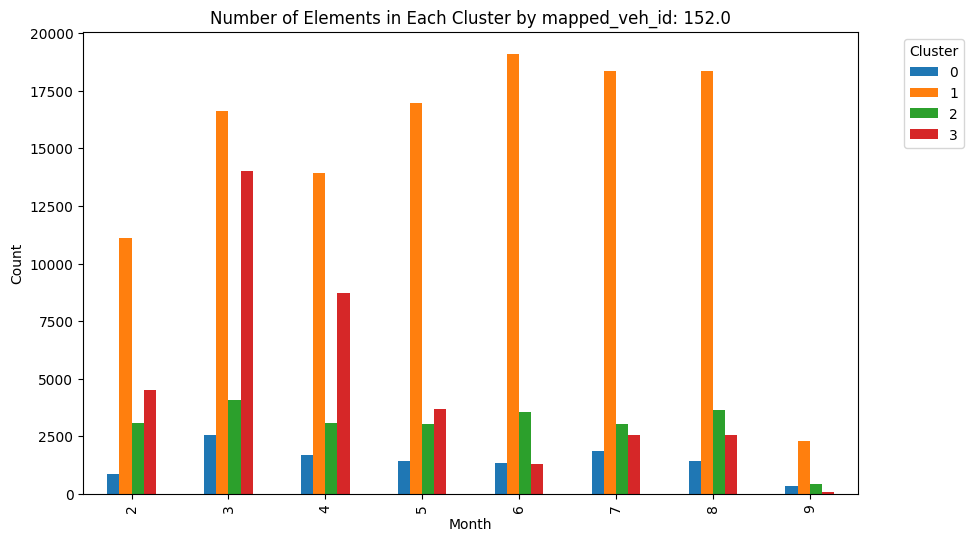

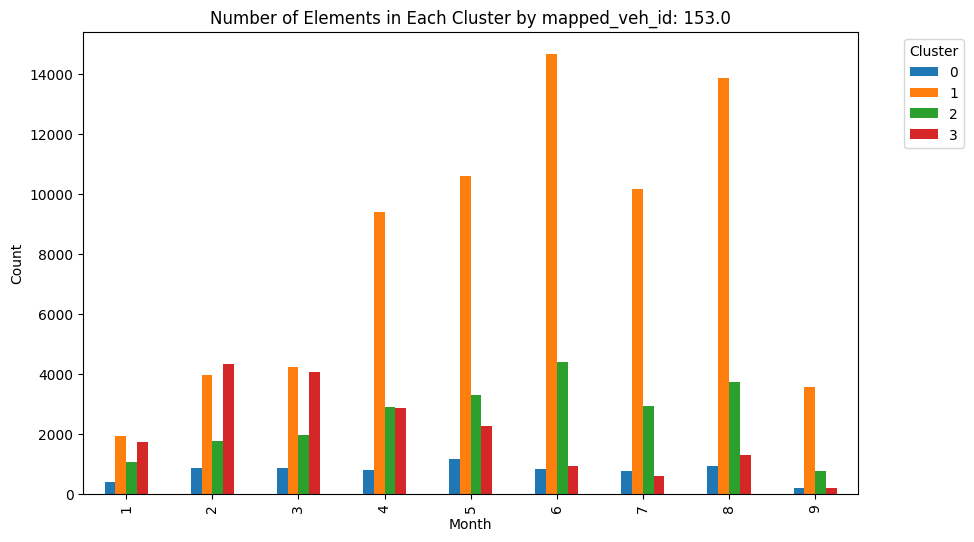

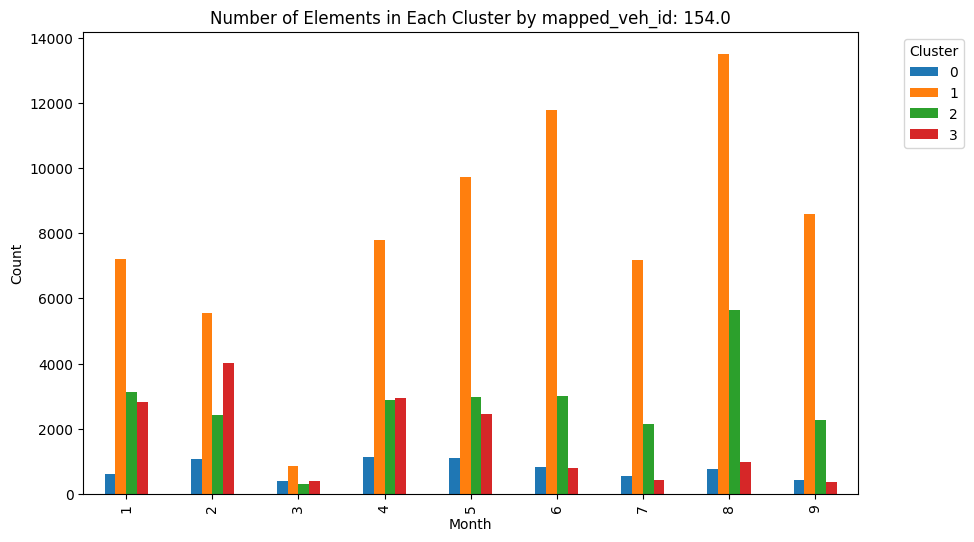

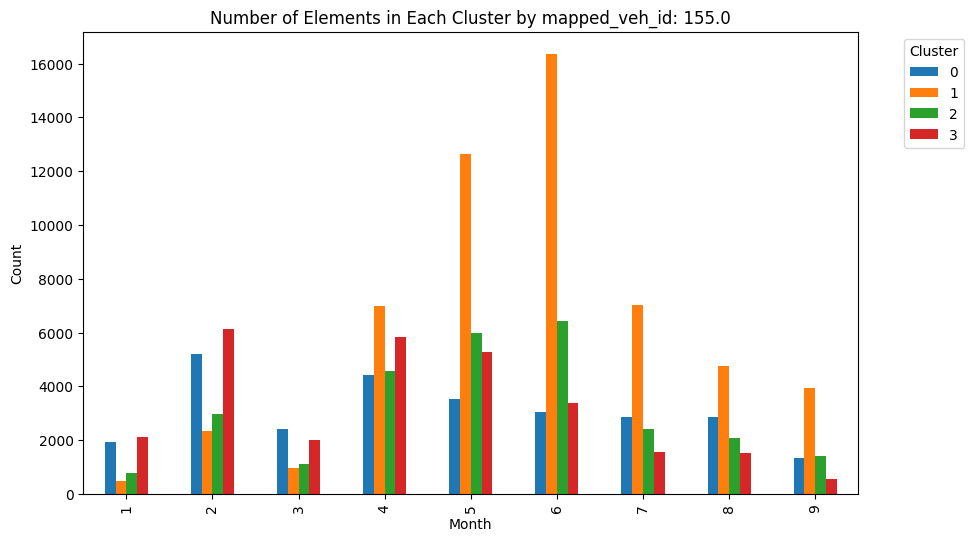

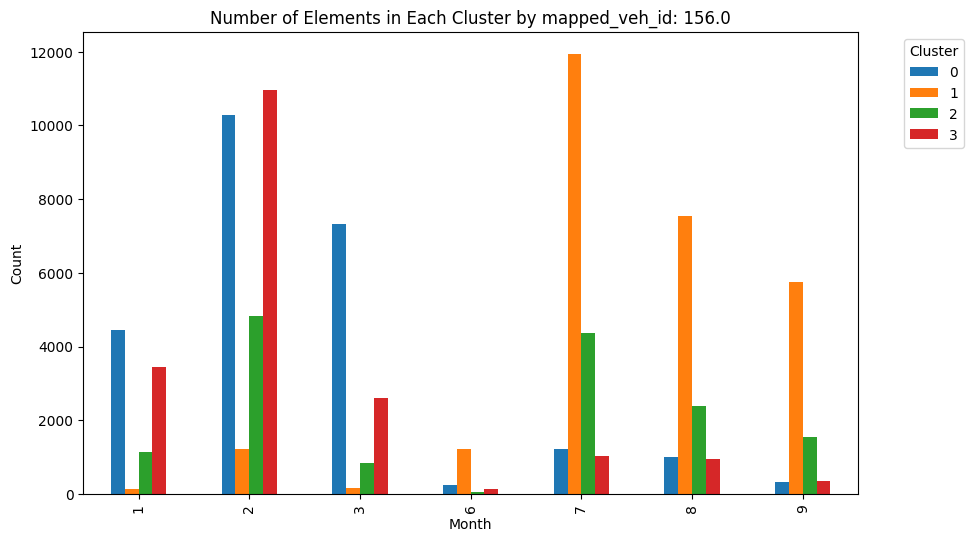

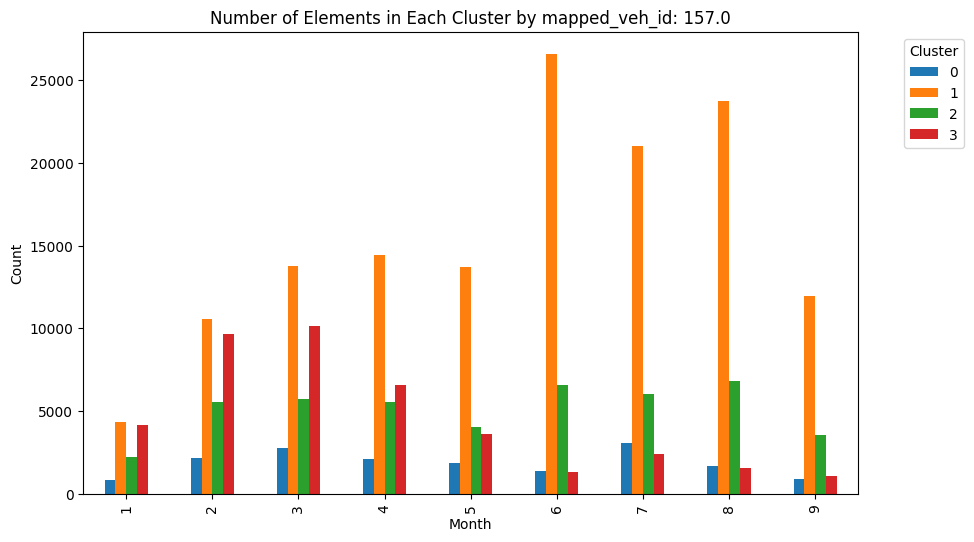

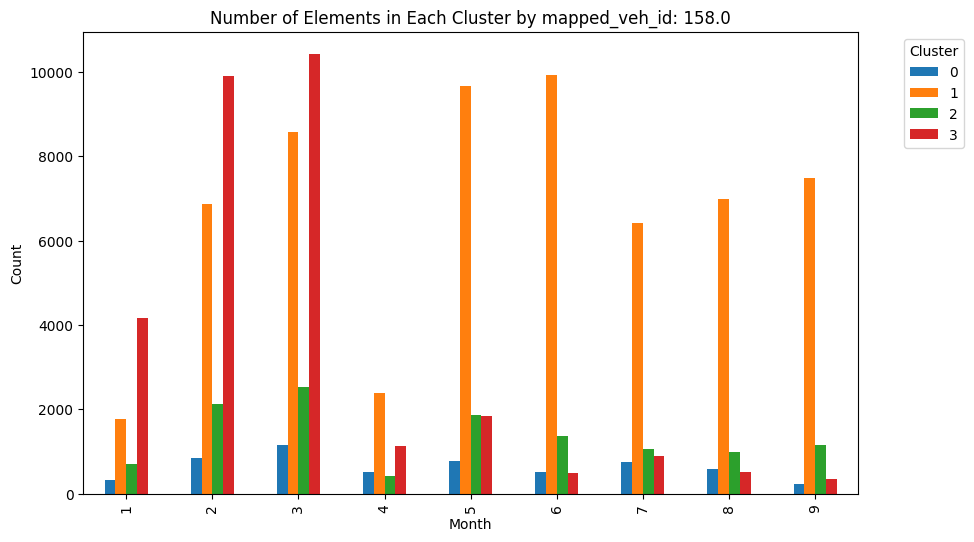

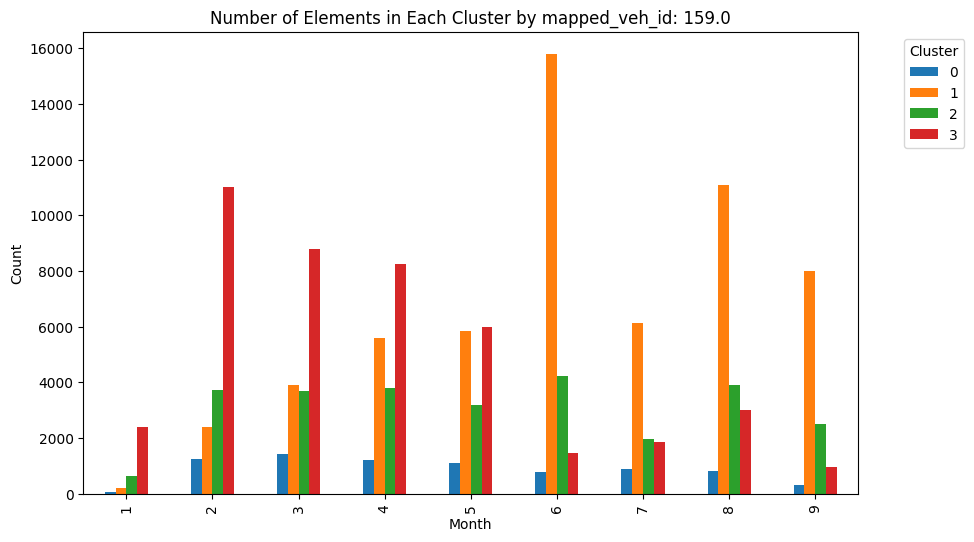

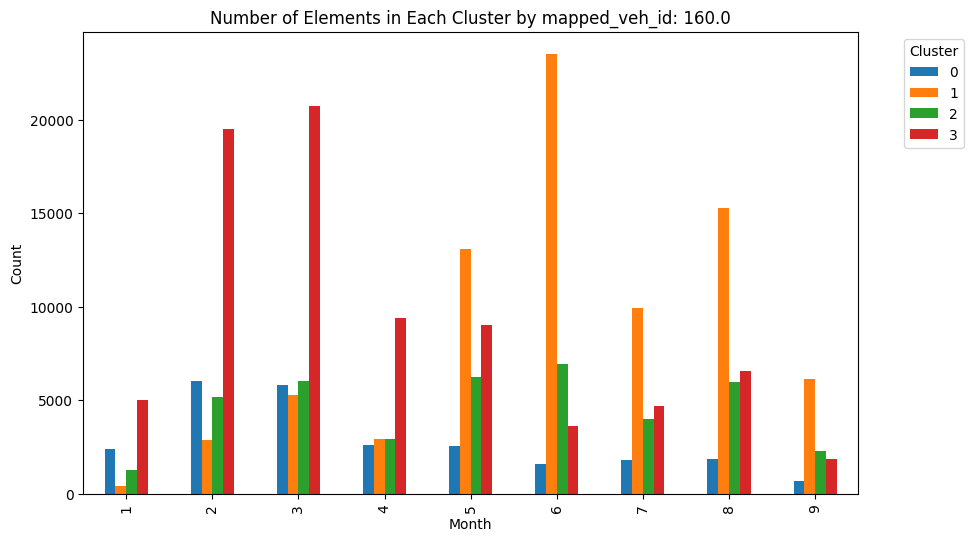

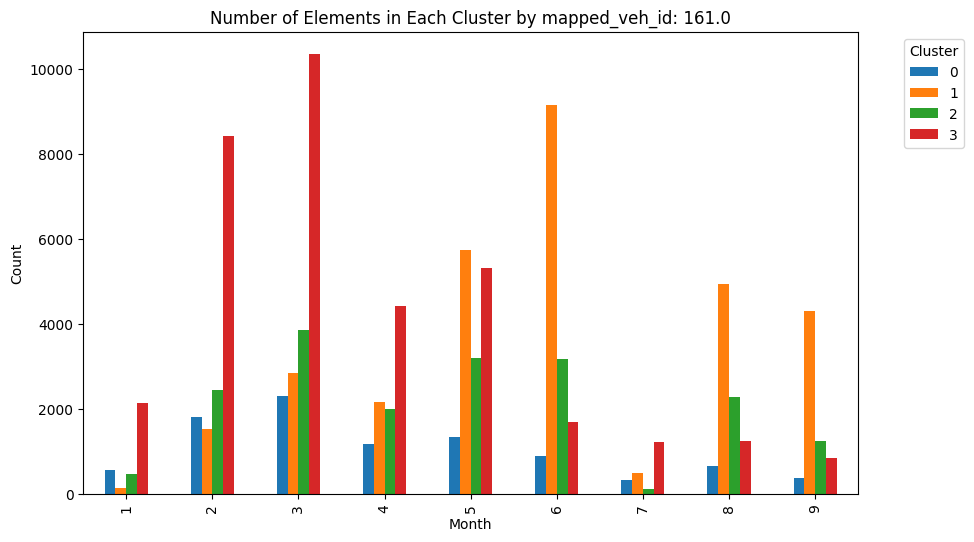

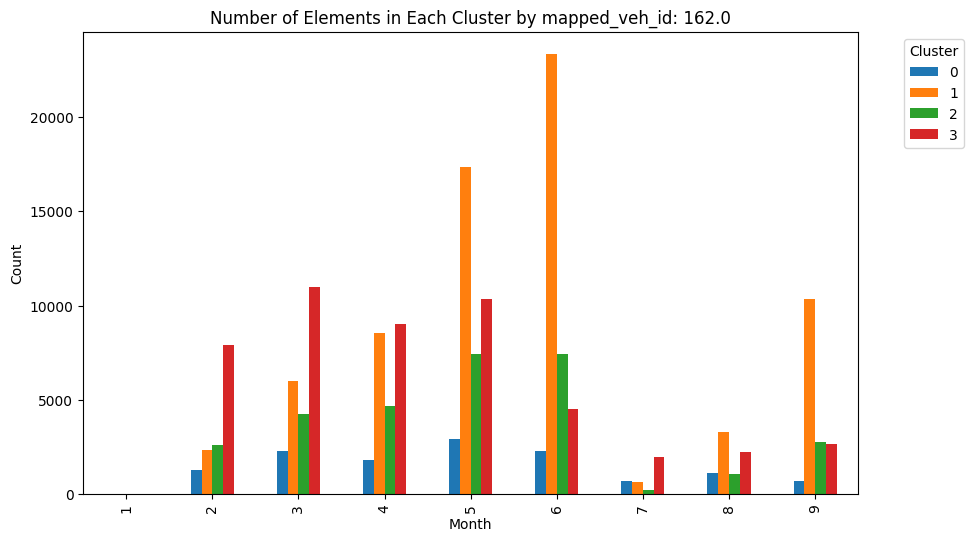

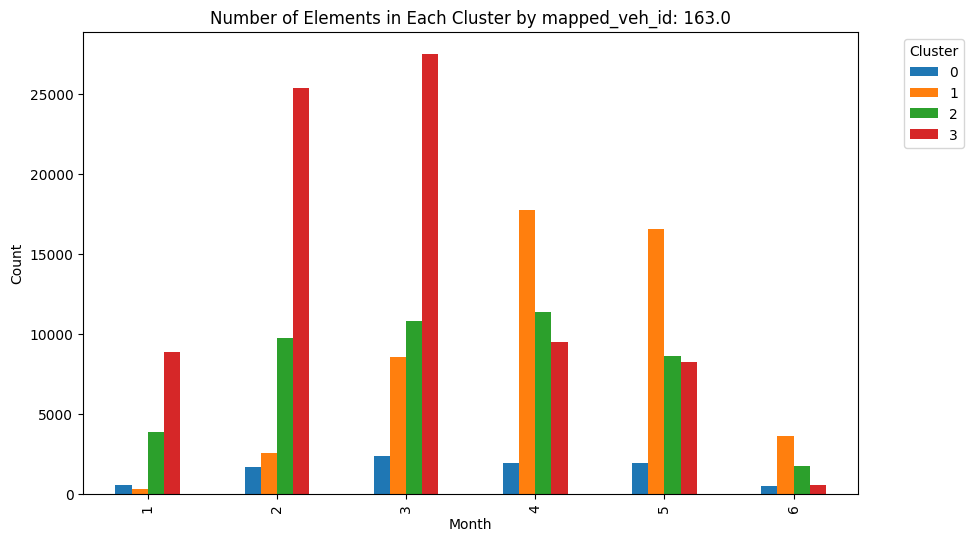

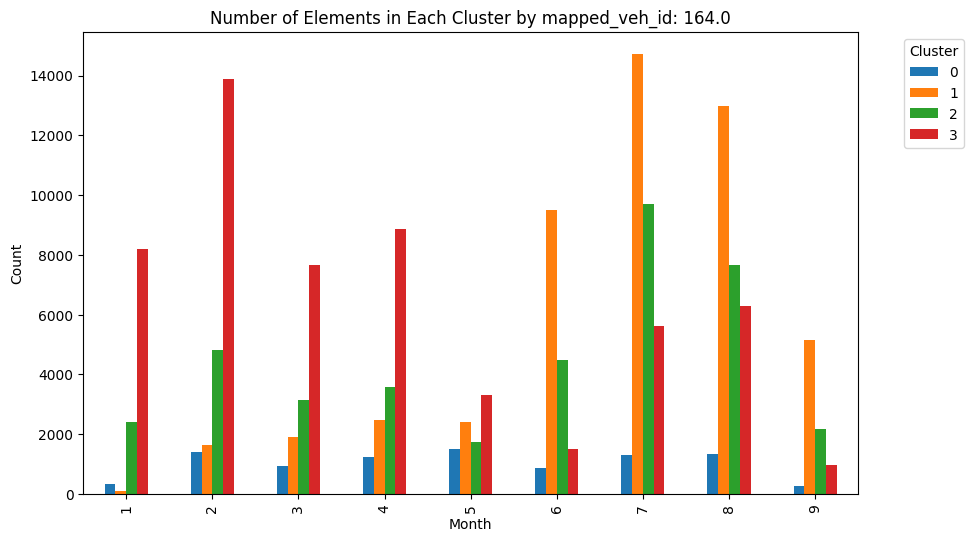

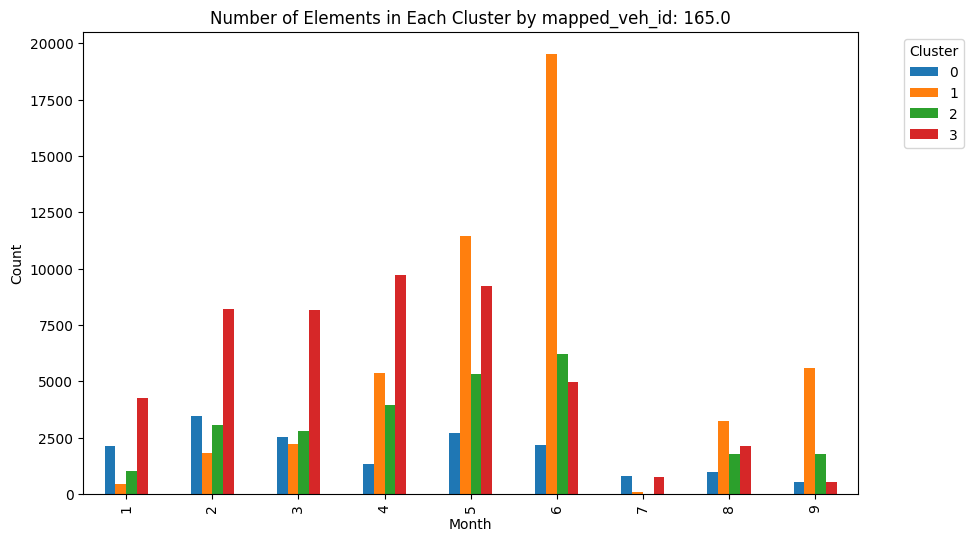

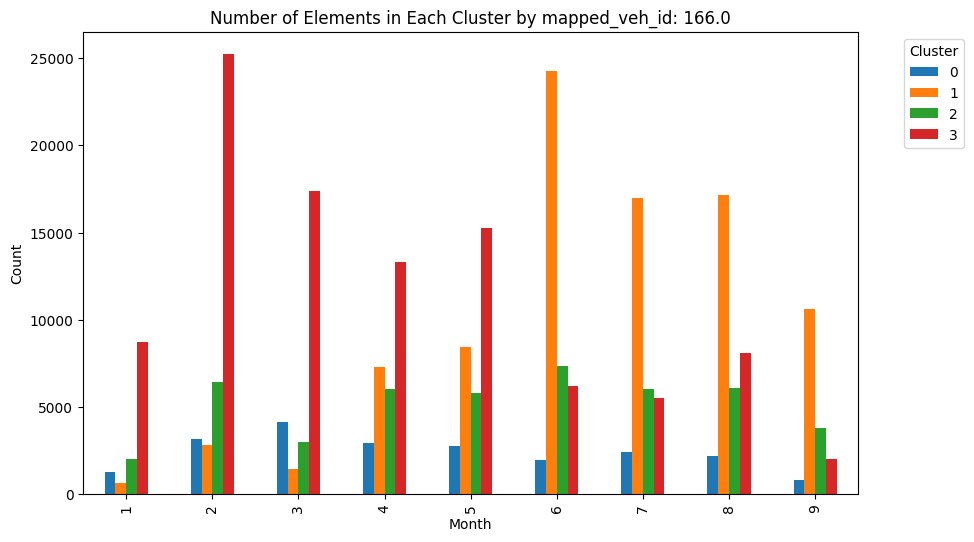

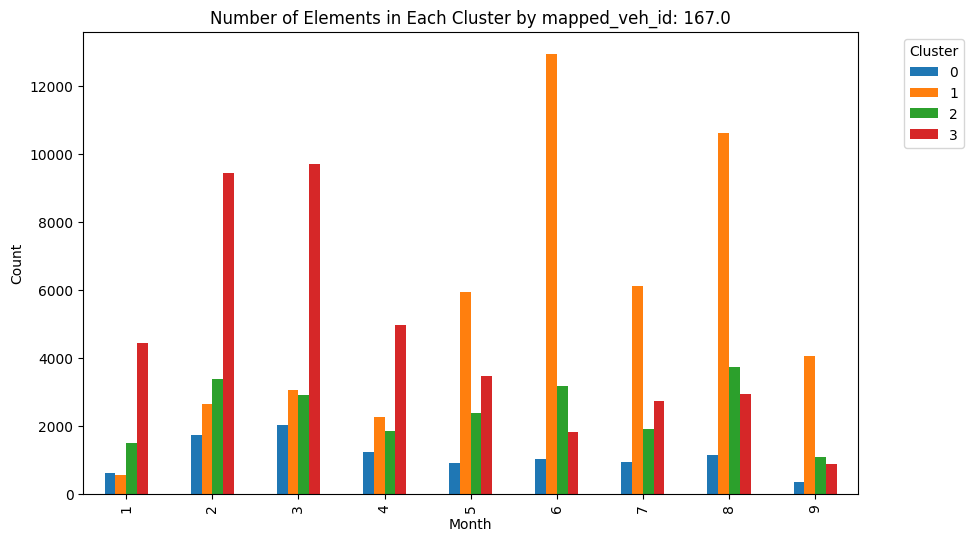

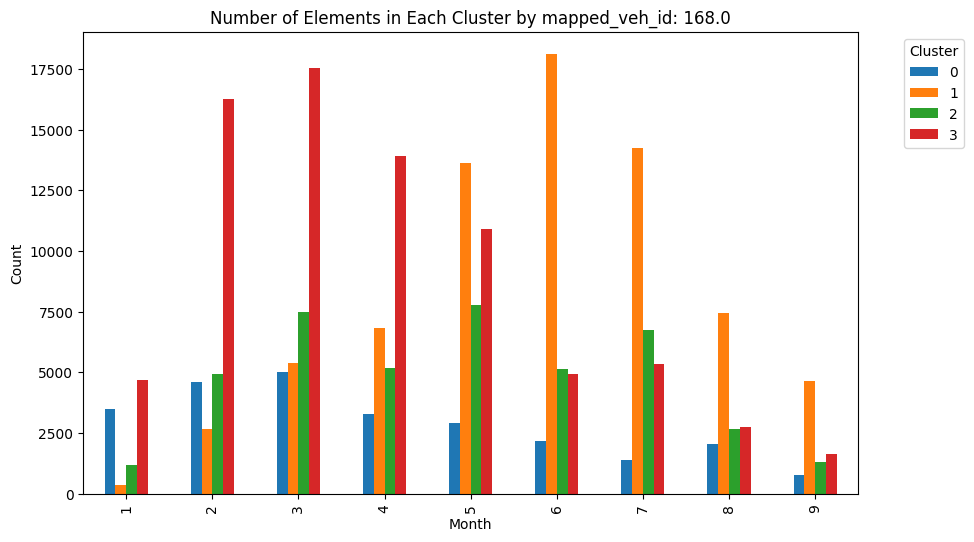

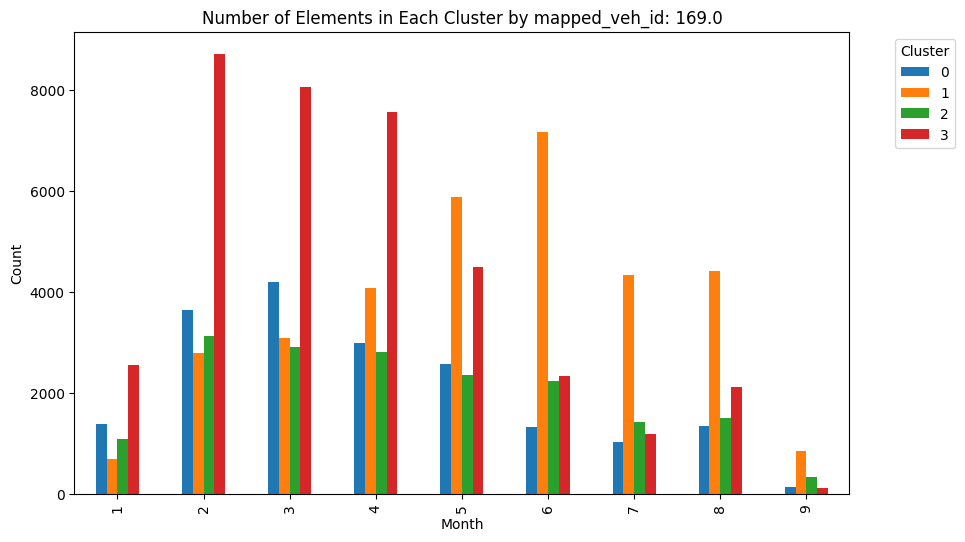

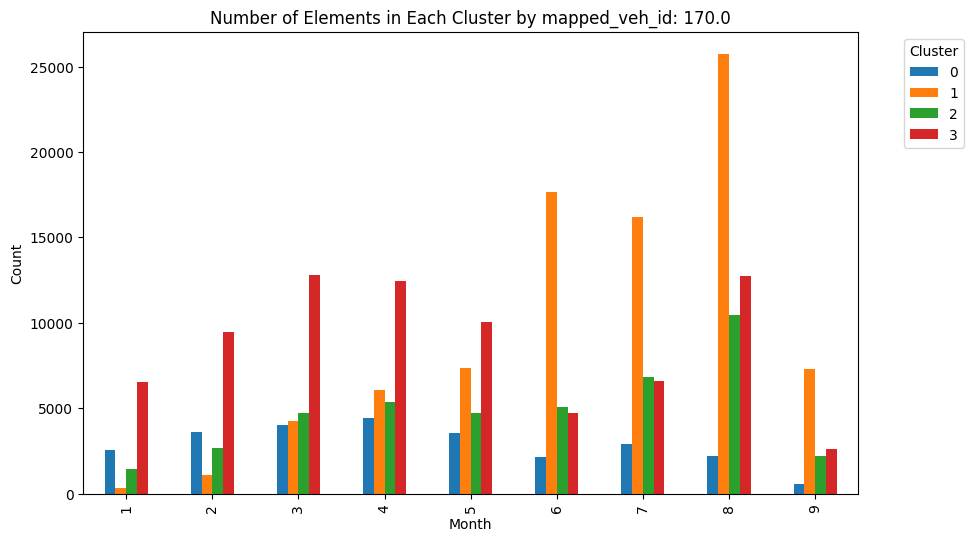

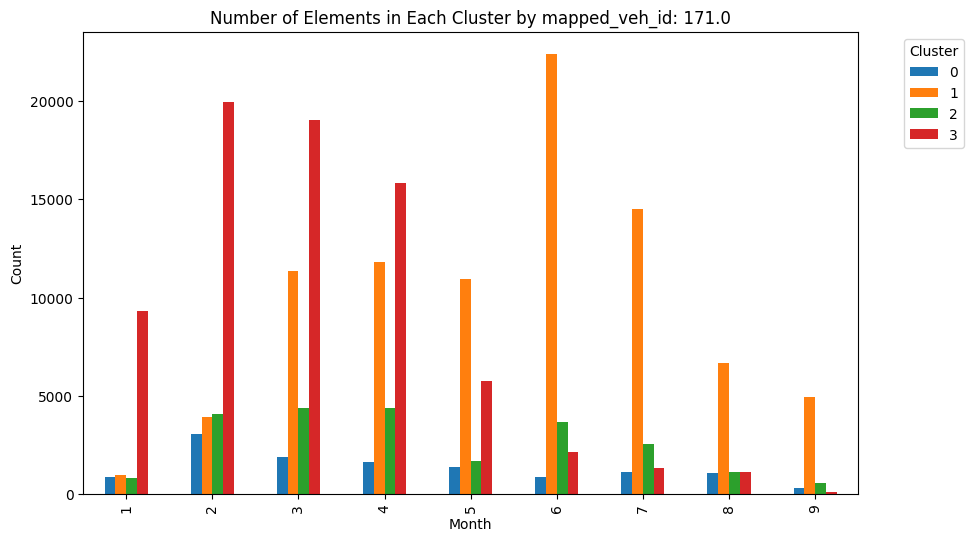

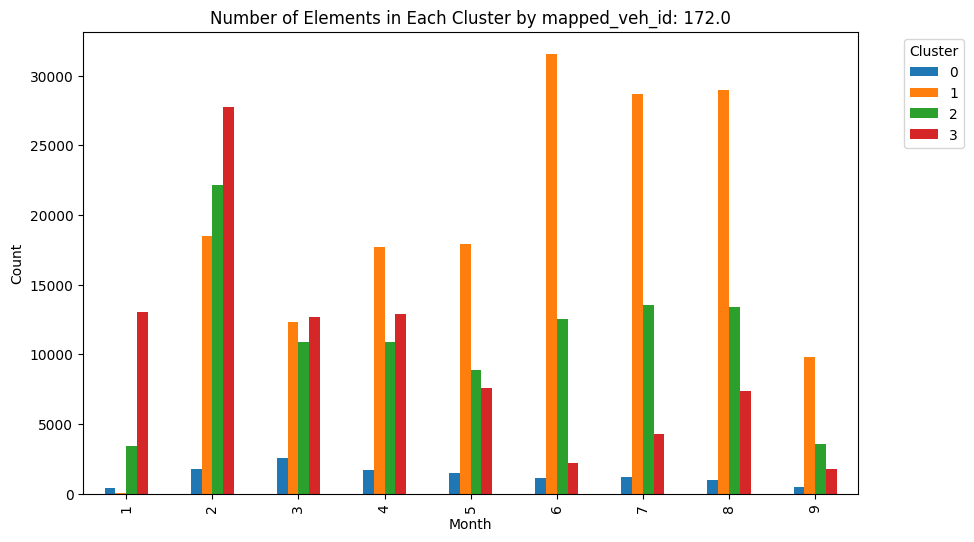

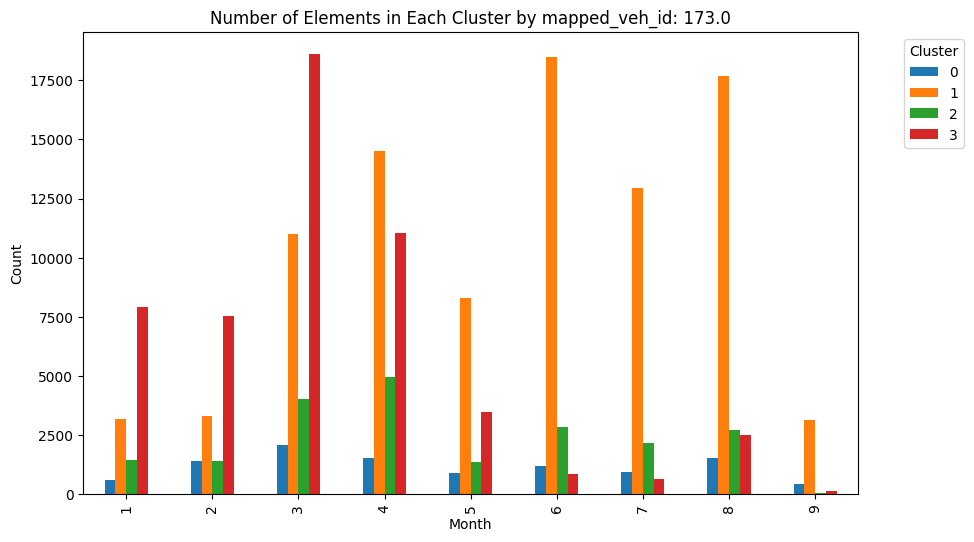

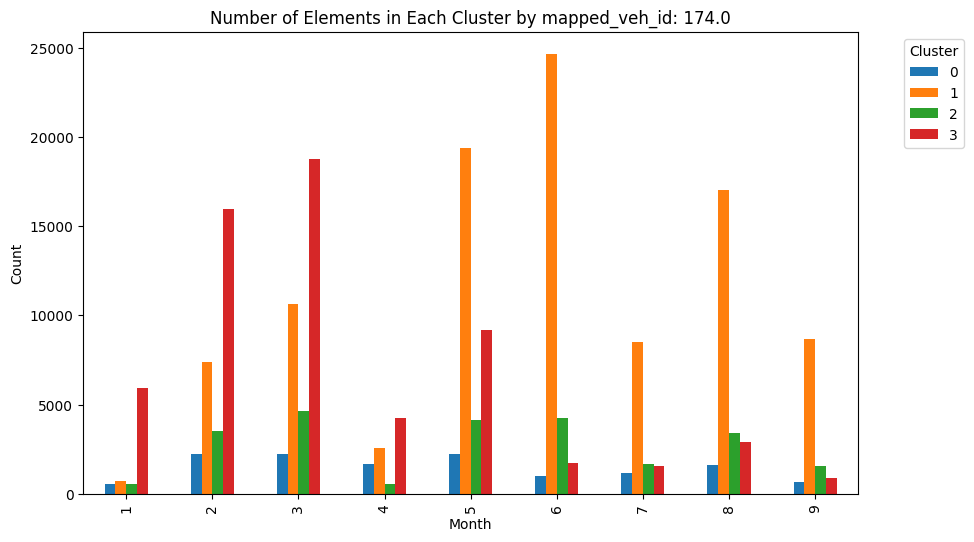

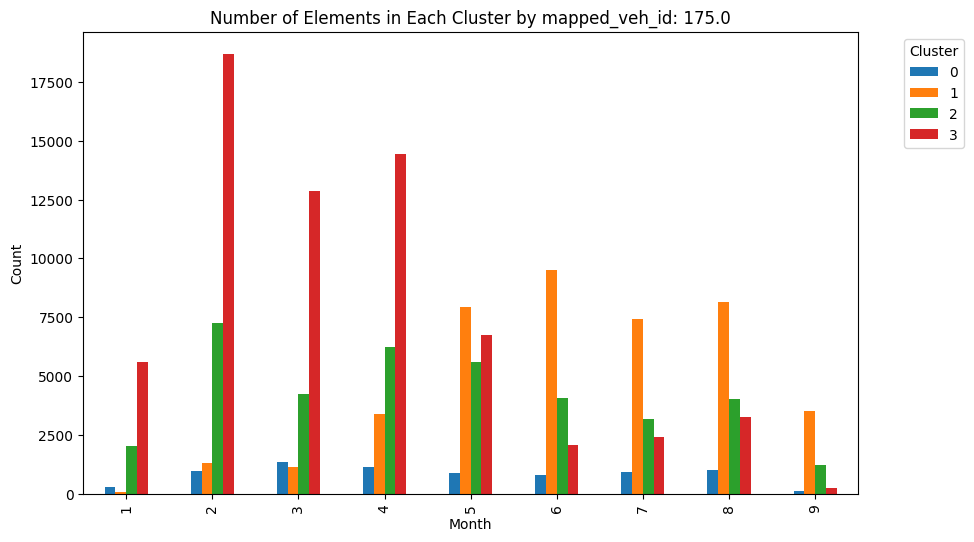

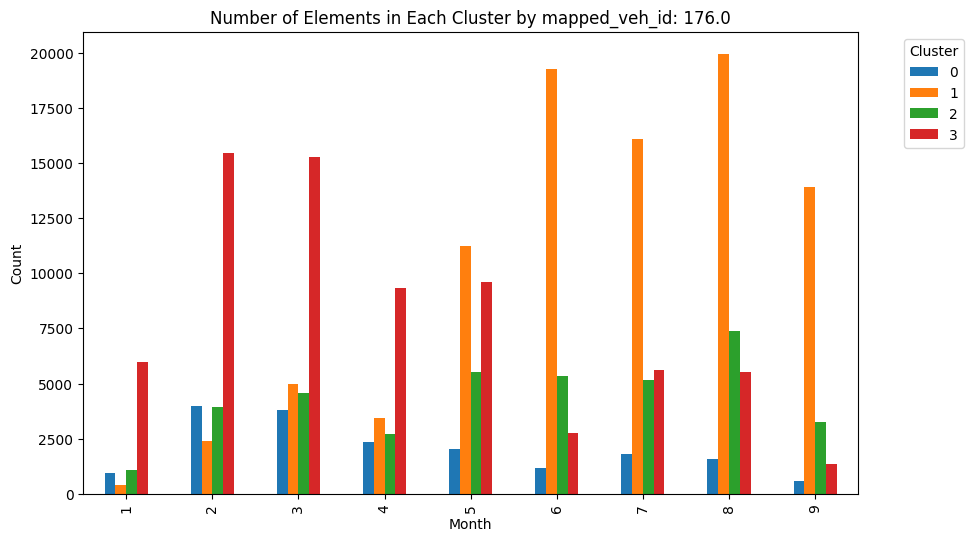

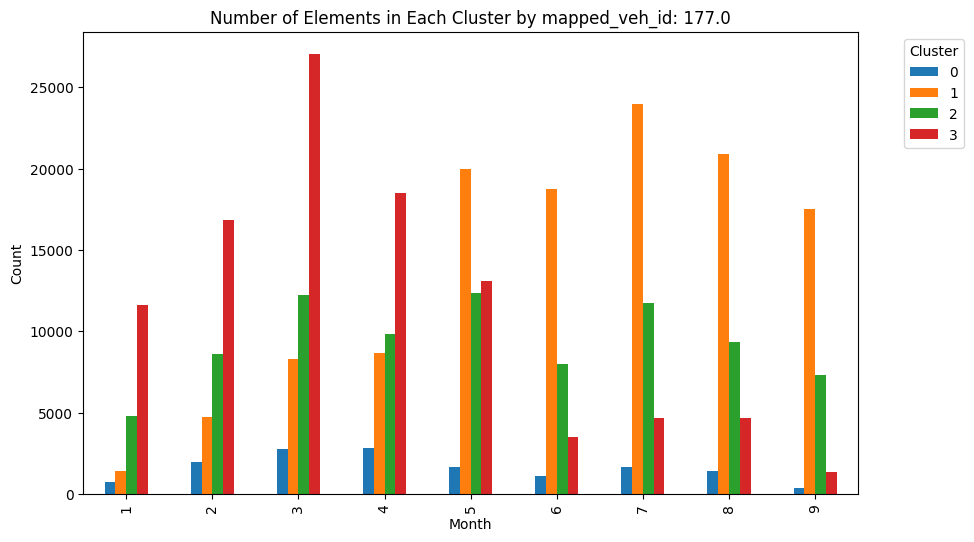

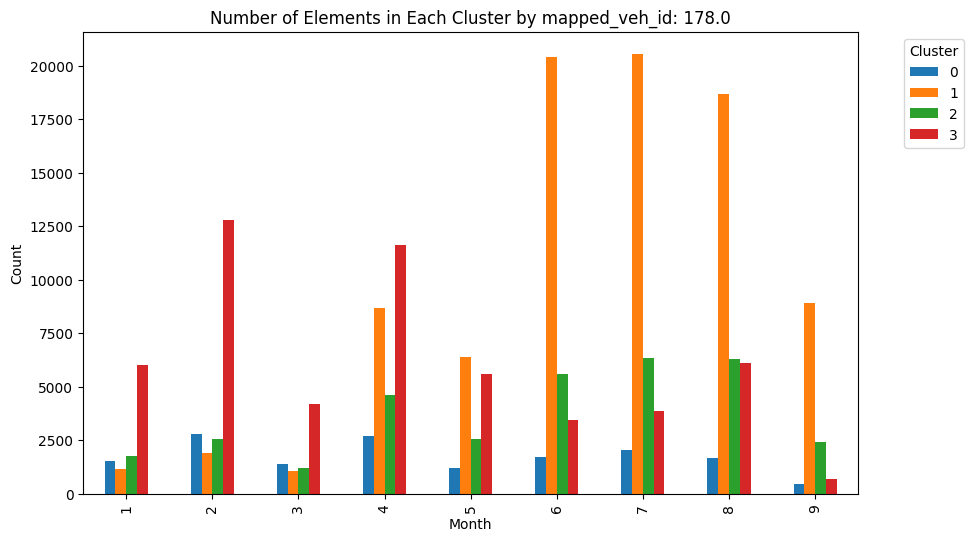

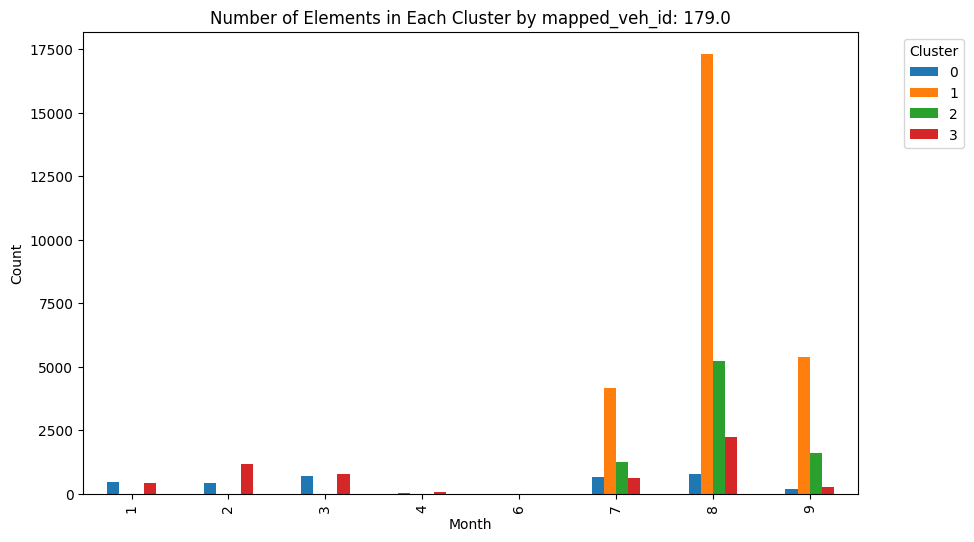

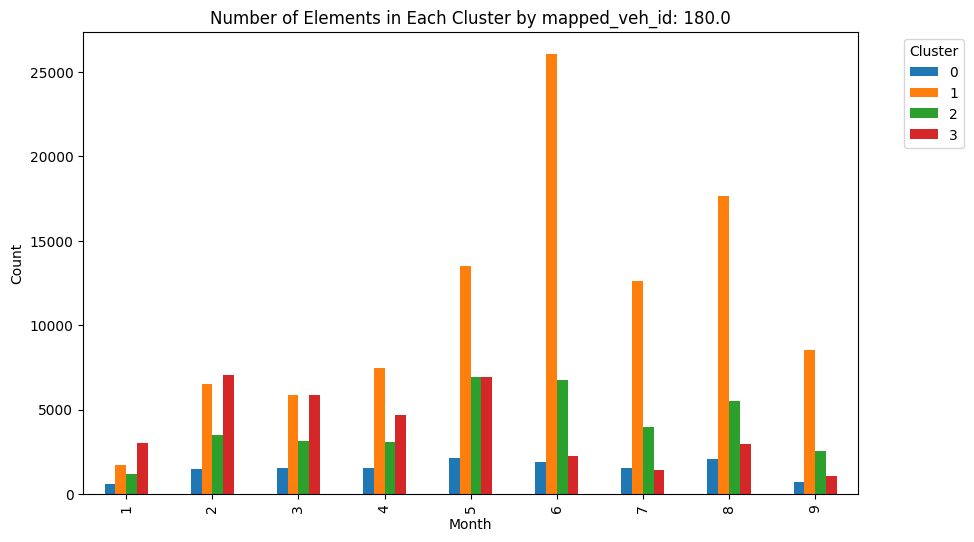

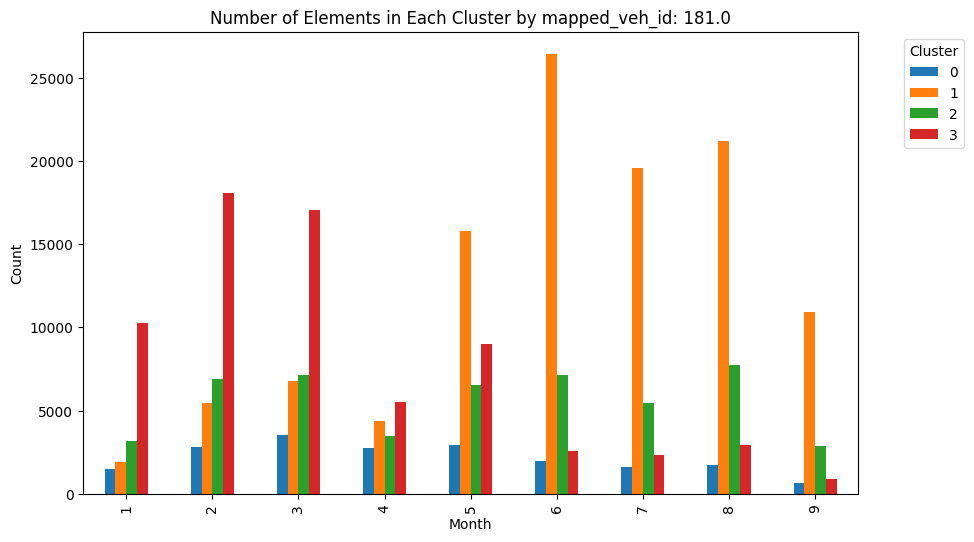

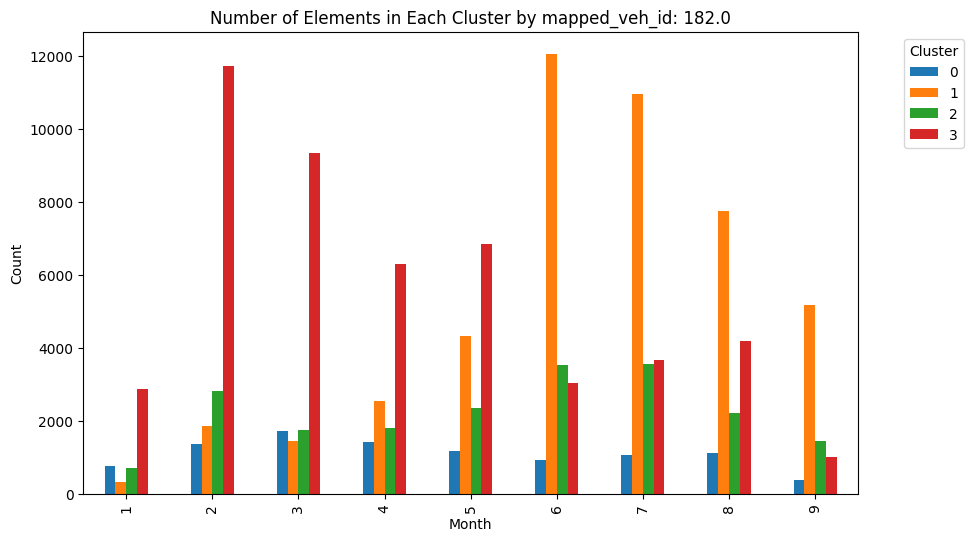

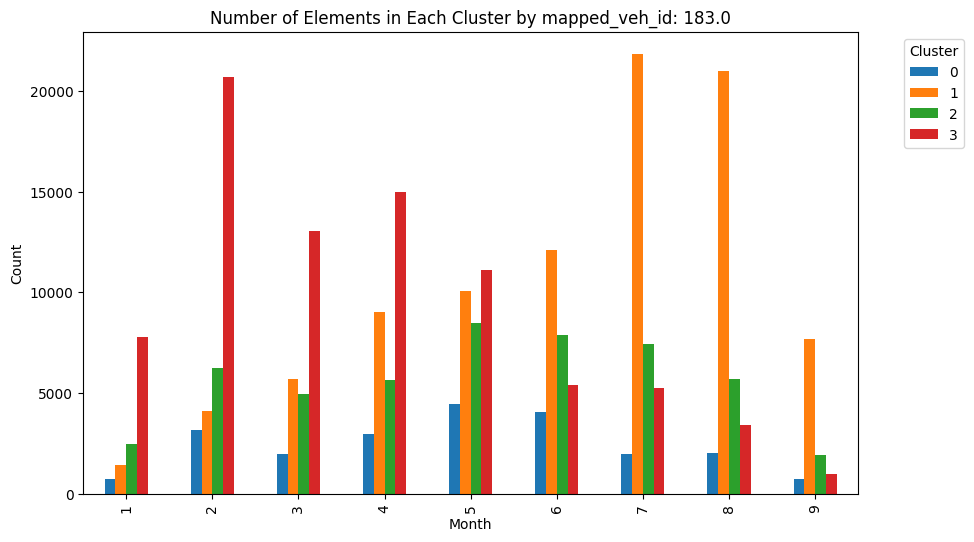

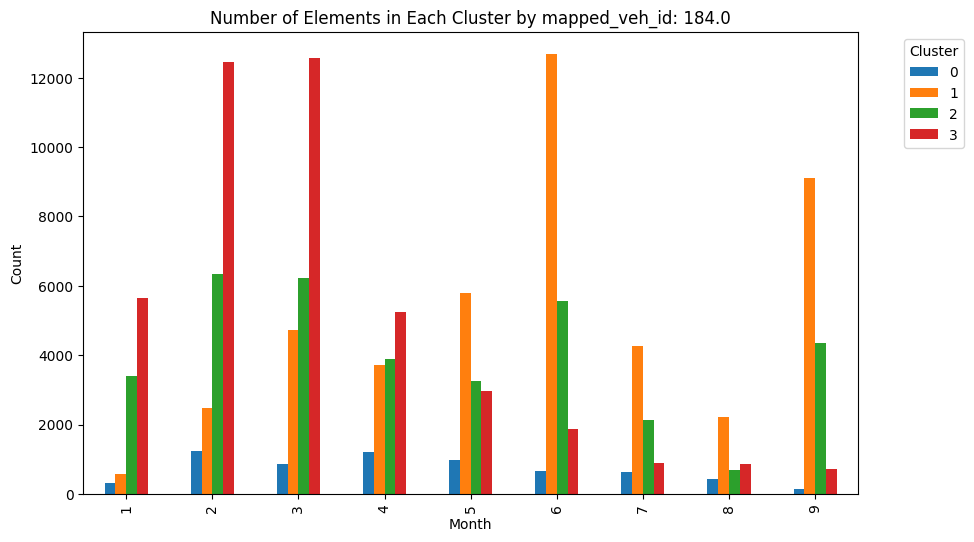

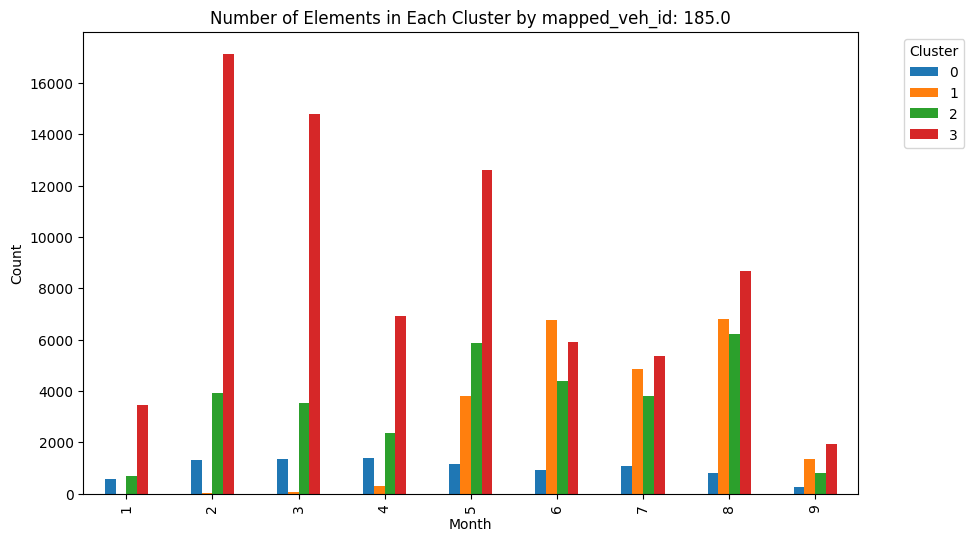

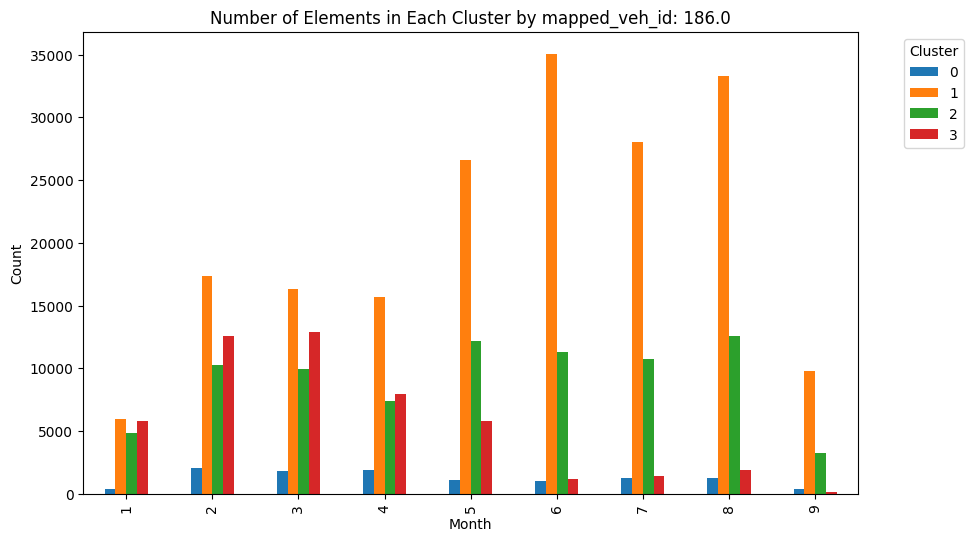

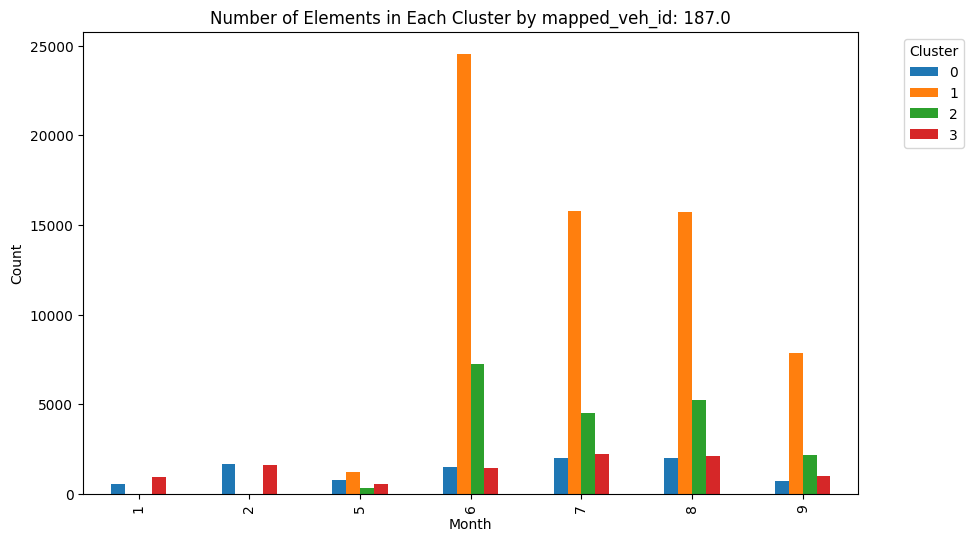

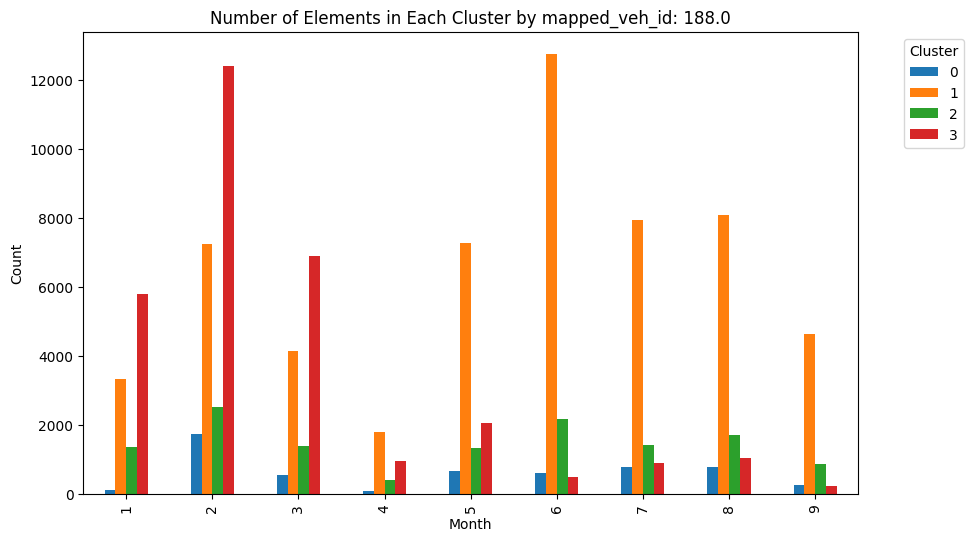

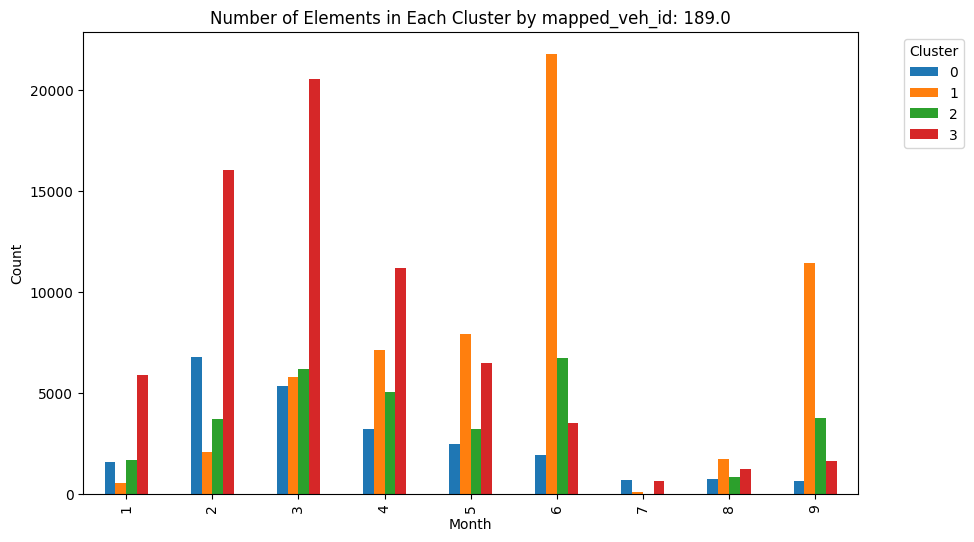

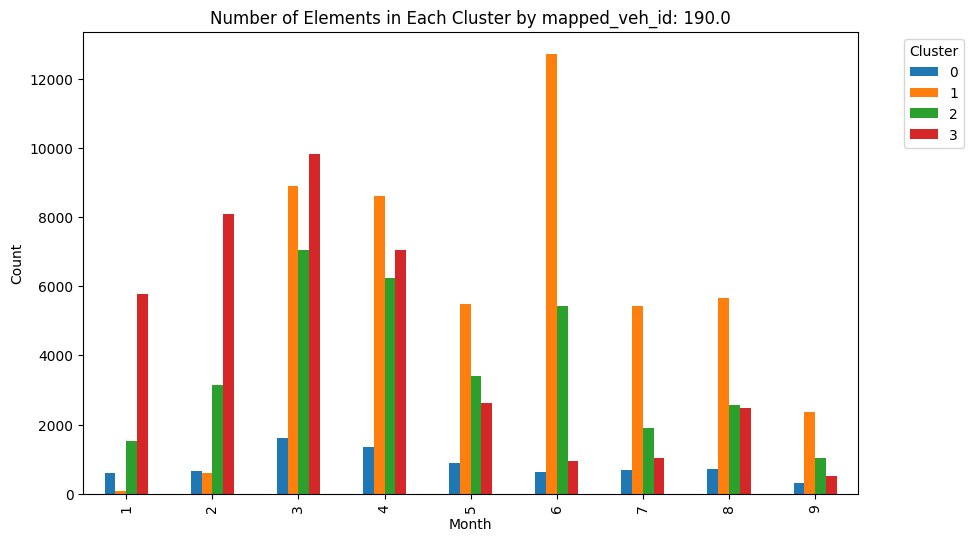

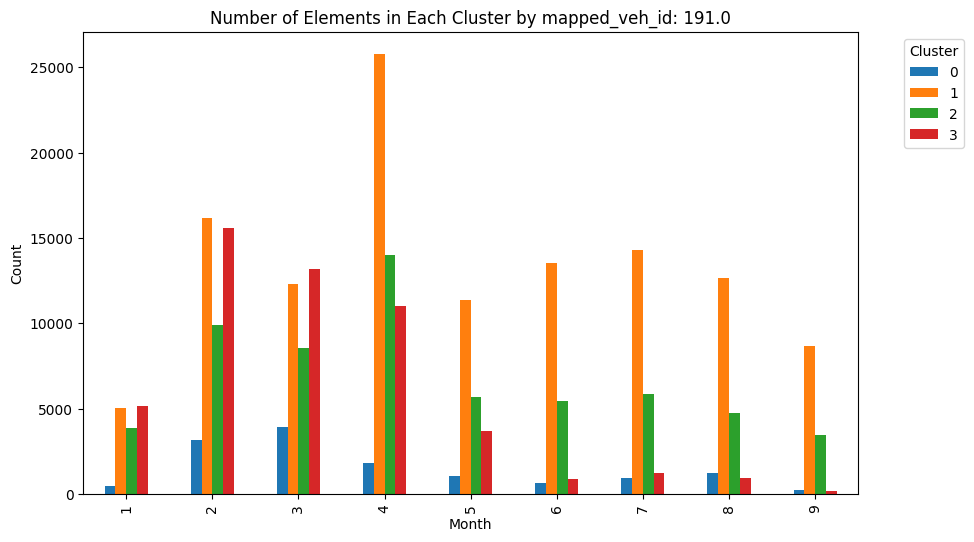

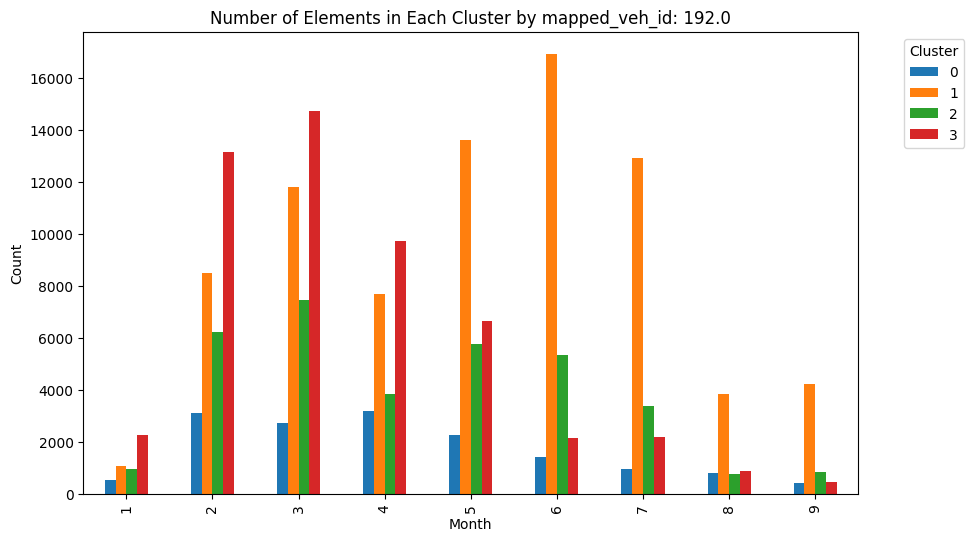

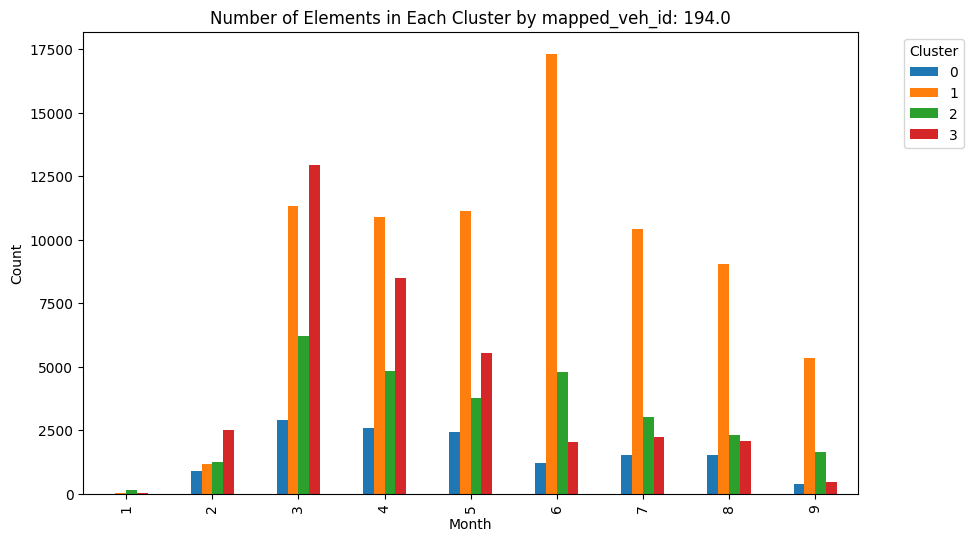

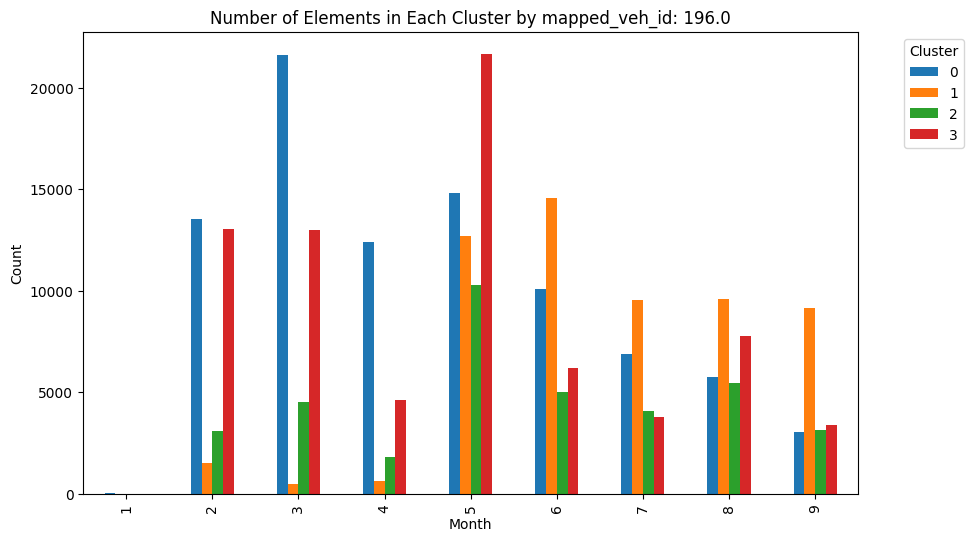

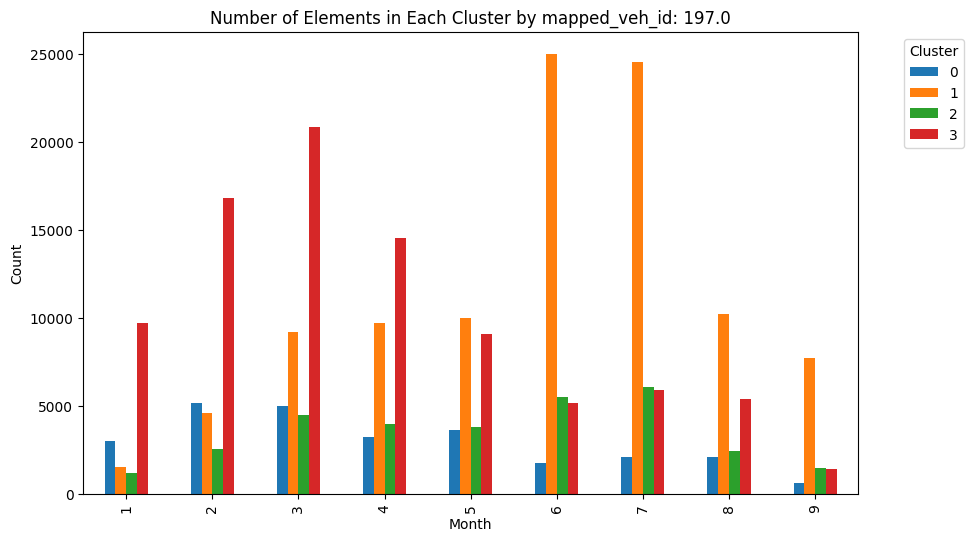

In [151]:
# Extract the month from the 'timestamps_UTC' column
data['month'] = pd.to_datetime(data['timestamps_UTC']).dt.month

# Group the data by 'mapped_veh_id', 'month', and 'cluster' and calculate the count
cluster_elements = data.groupby(['mapped_veh_id', 'month', 'cluster']).size().reset_index(name='count')

# Pivot the data to have 'mapped_veh_id' as the index, 'month' as the columns, 'cluster' as the sub-columns, and 'count' as the values
pivot_data = cluster_elements.pivot_table(index=['mapped_veh_id', 'month'], columns='cluster', values='count', fill_value=0)

# Plot the bar graph for each 'mapped_veh_id'
for veh_id in pivot_data.index.levels[0]:
    veh_data = pivot_data.loc[veh_id]
    veh_data.plot(kind='bar', stacked=False, figsize=(10, 6))
    plt.xlabel('Month')
    plt.ylabel('Count')
    plt.title(f'Number of Elements in Each Cluster by mapped_veh_id: {veh_id}')
    plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

In [152]:
# Analyse in depth data from id 131
data_131 = data[data['mapped_veh_id'] == 131]
# show mean
means = data_131.mean()
print(means)
print(data_131.count())
print(data_131[data_131['RS_E_OilPress_PC2'] > 600].count())

mapped_veh_id         131.000000
lat                    50.306776
lon                     4.447931
RS_E_InAirTemp_PC1     31.271198
RS_E_InAirTemp_PC2     32.762717
RS_E_OilPress_PC1     562.358361
RS_E_OilPress_PC2     689.873499
RS_E_RPM_PC1          902.637087
RS_E_RPM_PC2          905.081185
RS_E_WatTemp_PC1       79.488461
RS_E_WatTemp_PC2       79.626308
RS_T_OilTemp_PC1       75.917840
RS_T_OilTemp_PC2       77.920385
temperature            12.250502
precipitation           0.116939
windspeed_10m          13.260813
sum_pollen             17.490362
cluster                 1.849686
distance_to_center      5.352882
month                   4.942073
dtype: float64
timestamps_UTC        147272
mapped_veh_id         147272
lat                   147272
lon                   147272
RS_E_InAirTemp_PC1    147272
RS_E_InAirTemp_PC2    147272
RS_E_OilPress_PC1     147272
RS_E_OilPress_PC2     147272
RS_E_RPM_PC1          147272
RS_E_RPM_PC2          147272
RS_E_WatTemp_PC1      147272
RS_E_W

/var/folders/fj/rsg75z_s7cq8mvy8kr0fb2ym0000gn/T/ipykernel_20022/2094537836.py:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  means = data_131.mean()


In [153]:
# print the average oil pressure per id
means = data.groupby('mapped_veh_id').mean()
means[means['RS_E_OilPress_PC1']>400]





/var/folders/fj/rsg75z_s7cq8mvy8kr0fb2ym0000gn/T/ipykernel_20022/381878256.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  means = data.groupby('mapped_veh_id').mean()


,lat,lon,RS_E_InAirTemp_PC1,RS_E_InAirTemp_PC2,RS_E_OilPress_PC1,RS_E_OilPress_PC2,RS_E_RPM_PC1,RS_E_RPM_PC2,RS_E_WatTemp_PC1,RS_E_WatTemp_PC2,RS_T_OilTemp_PC1,RS_T_OilTemp_PC2,temperature,precipitation,windspeed_10m,sum_pollen,cluster,distance_to_center,month
mapped_veh_id,,,,,,,,,,,,,,,,,,,
131.0,50.306776,4.447931,31.271198,32.762717,562.358361,689.873499,902.637087,905.081185,79.488461,79.626308,75.917840,77.920385,12.250502,0.116939,13.260813,17.490362,1.849686,5.352882,4.942073
196.0,50.314700,4.451656,24.141483,25.354994,645.098983,289.215225,912.333873,906.412496,71.347812,72.102713,72.123227,72.988356,12.635863,0.102298,12.765873,16.813345,1.374391,4.314405,5.204908
